# ASSIGNMENT REPORT NOTEBOOK

| Môn học | **Cơ sở Toán cho Khoa học Máy tính (Mathematics Fundamentals for Computer Science)** |
| - | - |
| Mã môn học | **CO5097** |
| Giảng viên | **Thầy Nguyễn An Khương** |
| Nhóm | **Optimization Momentum** |


#### Danh sách thành viên:

| # | Họ và tên | MSHV |
| - | - | - |
| 1 | Lê Thái Bình | 2570081 |
| 2 | Ngô Duy Bảo | 2570395 |
| 3| Trần Thái Học | 2570426 |
| 4 | Tiêu Trí Kiệt | 2570436 |


#### Nội dung tham khảo:

- [12.6 Momentum](d2l.ai/chapter_optimization/momentum.html)
- [Bài 8 Gradient Descent (phần 2/2)](https://machinelearningcoban.com/2017/01/16/gradientdescent2/)


## I. Giới thiệu
---

### **I.1. Phát biểu bài toán (Problem Statement)**

Trong học sâu, ta thường cần tìm bộ tham số $w$ tối ưu để giảm thiểu một hàm mất mát: $min_{w}f(\mathbf{w})$. <br>

Gradient descent cập nhật tham số theo: $\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla f(\mathbf{w})$.<br>

Tuy nhiên, gradient descent thường gặp các vấn đề:

- **Hội tụ chậm**, đặc biệt ở các vùng rãnh dốc (ravines) hoặc nơi đạo hàm thay đổi mạnh theo từng chiều.
- **Dễ bị dao động** (oscillation) khi gradient ở hướng này rất lớn nhưng ở hướng kia rất nhỏ.
- Khó thoát khỏi các vùng “bằng phẳng” (flat regions).

Ví dụ:

\begin{aligned}
f(x,y) = 0.1x^2 + y^2 \tag{1.1}
\end{aligned}

![SGD vs Momentum](./figure_1.png)

![SGD vs Momentum on Flat Region](./figure_2.png)

Hoặc hàm như sau:

\begin{aligned}
f(x) = 0.1x^2 + 0.001x^4 \tag{1.2}
\end{aligned}

![SGD vs Momentum on Flat Region](./figure_3.png)

Để giải quyết các nhược điểm này, ta sử dụng **Momentum**.





### **I.2 CÁC BÀI TOÁN**


#### I.2.1 Leaky Averages

*Nhắc lại kiến thức về Gradient Descent và SGD Minibatch*

Theo **Gradient Descent**, ta có:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta_t \mathbf{g}_t
$$

$$
\mathbf{g}_t = \partial_{\mathbf{w}} f(\mathbf{x}_{t}, \mathbf{w})
$$

Trong đó:

- $\mathbf{w}$: tham số mô hình  
- $\eta_t$: Learning rate  
- $\mathbf{g}_t$: Gradient của hàm loss function tại thời điểm t  
- $\mathbf{x}_t$: Dữ liệu đầu vào  
- $f(\mathbf{x}_{t}, \mathbf{w})$: hàm loss khi dự đoán trên mẫu \(x_t\)  
- $\partial_{\mathbf{w}}$: đạo hàm riêng theo w  

**Minibatch SGD**

$$
\mathbf{g}_{t, t-1}
= \partial_{\mathbf{w}} 
  \frac{1}{|\mathcal{B}_t|}
  \sum_{i \in \mathcal{B}_t} 
  f(\mathbf{x}_{i}, \mathbf{w}_{t-1})
= \frac{1}{|\mathcal{B}_t|}
  \sum_{i \in \mathcal{B}_t} 
  \mathbf{h}_{i, t-1}
$$

Trong đó:

- $\mathbf{h}_{i, t-1} = \partial_{\mathbf{w}} f(\mathbf{x}_i, \mathbf{w}_{t-1})$  
- $\mathbf{w}_{t-1}$: tham số trước bước cập nhật  
- $|\mathcal{B}_t|$: kích thước batch  
- $\mathbf{g}_{t,t-1}$: gradient trung bình của mini-batch  

Minibatch SGD giúp giảm nhiễu trong từng batch, nhưng vẫn còn nhiễu giữa các batch → cần **Leaky Average**.

##### Trung bình trượt (Leaky Average)

Ý tưởng: lưu trữ gradient tích lũy nhiều bước trước:

$$
\mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t,t-1}
$$

Trong đó:

- $\mathbf{v}_t$: vận tốc (momentum-like)  
- $0 \le \beta < 1$: hệ số ghi nhớ  
- Nếu $\beta = 0$: chỉ dùng gradient hiện tại  
- Nếu $\beta$ lớn: dùng nhiều thông tin lịch sử, giảm nhiễu nhưng chậm đổi hướng  

Khai triển 2 bước

\begin{aligned}
\mathbf{v}_t 
&= \beta(\beta \mathbf{v}_{t-2} + \mathbf{g}_{t-1,t-2}) + \mathbf{g}_{t,t-1} \\
&= \beta^2 \mathbf{v}_{t-2} 
  + \beta \mathbf{g}_{t-1,t-2}
  + \mathbf{g}_{t,t-1}
\end{aligned}

Khai triển 3 bước

\begin{aligned}
\mathbf{v}_t 
= \beta^3 \mathbf{v}_{t-3}
 + \beta^2 \mathbf{g}_{t-2,t-3}
 + \beta\, \mathbf{g}_{t-1,t-2}
 + \mathbf{g}_{t,t-1}
\end{aligned}

Khai triển k bước

\begin{aligned}
\mathbf{v}_t =
\beta^k \mathbf{v}_{t-k}
+ \sum_{\tau=0}^{k-1}
  \beta^\tau \mathbf{g}_{t-\tau,\,t-\tau-1}
\end{aligned}

Khai triển t bước

\begin{aligned}
\mathbf{v}_t =
\beta^{t} \mathbf{v}_{0}
+ \sum_{\tau=0}^{t-1}
  \beta^\tau \mathbf{g}_{t-\tau,\,t-\tau-1}
\end{aligned}

Với khởi tạo $\mathbf{v}_0 = 0$:

\begin{aligned}
\mathbf{v}_t
&=
\sum_{\tau=0}^{t-1}
\beta^\tau 
\mathbf{g}_{t-\tau,\,t-\tau-1} \\
&=
\mathbf{g}_{t,t-1}
+ \beta \mathbf{g}_{t-1,t-2}
+ \beta^2 \mathbf{g}_{t-2,t-3}
+ \cdots
\end{aligned}


Với $0 \le \beta < 1$:

$$
1 + \beta + \beta^2 + \cdots
=
\frac{1}{1 - \beta}
$$

Tổng trọng số lớn hơn 1 ⇒ đây **không phải** Exponential Moving Average (EMA), mà được gọi là: **Leaky Average**

##### Kết luận

- Chỉ là tổ hợp tuyến tính giảm dần theo $\beta^\tau$
- Tổng trọng số > 1 ⇒ không phải trung bình chuẩn hóa
- Giúp làm mượt gradient, giảm nhiễu giữa các batch



#### I.1.2.2 An Ill-conditioned Problem

$$f(\mathbf{x}) = 0.1 x_1^2 + 2 x_2^2.$$

Hàm $f$ là hàm bậc 2 lồi, có 1 điểm cực tiểu tại $(0, 0)$


$$ \nabla f(x) = (0.2x_1, 4x_2)^\top $$



Ta thấy gradient theo hướng $x_2$ nhanh hơn gấp 20 lần so với $x_1$.



Để minh họa, chúng ta sẽ thử áp dụng Gradient Descent cho hàm này với learning rate = 0.4


epoch 20, x1: -0.943467, x2: -0.000073


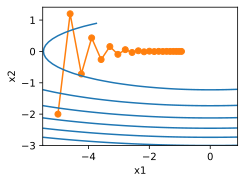

In [1]:
from d2l import torch as d2l

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Quát sát hình trên ta thấy, với Gradient Descent với learning rate = 0.4, gradient theo hướng $x_2$ lớn hơn và thay đổi nhanh hơn nhiều so với chiều $x_1$. Do đó, ta chỉ có 2 lựa chọn:
- Với learning rate nhỏ, ta đảm bảo $x_2$ không bị phân kì, nhưng $x_1$ sẽ hội tụ rất chậm
- Ngược lại, nếu dùng learning rate lớn, ta tiến nhanh theo hướng $x_1$ nhưng lại bị phân kỳ theo hướng $x_2$ ​

Minh họa learning rate = 0.2

epoch 20, x1: -2.210012, x2: -0.000000


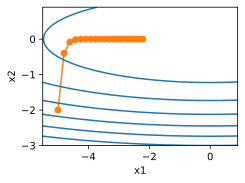

In [2]:
eta = 0.2
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Ta thấy Với learning rate 0.2, ta đảm bảo $x_2$ không bị phân kì, nhưng $x_1$ sẽ hội tụ rất chậm

Minh họa learning rate = 0.6

epoch 20, x1: -0.387814, x2: -1673.365109


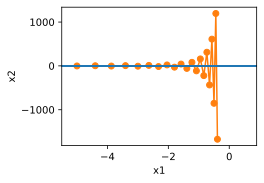

In [3]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Nếu dùng learning rate = 0.6, ta tiến nhanh theo hướng $x_1$ nhưng lại bị phân kỳ theo hướng $x_2$ ​

Kết luận: Gradient Descent gặp khó khăn khi giải quyết bài toán  Ill-conditioned


### **I.3 Định nghĩa (Definition)**

Trong D2L, momentum được mô tả như việc ta tích luỹ gradient theo thời gian bằng một biến vận tốc (velocity):

$$
\mathbf{v} = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t, t-1}
$$

Trong đó:

- $\beta$ là hệ số momentum (thường 0.9)
- $\mathbf{v}$ là “quán tính” hướng cập nhật


Cập nhật $\mathbf{x}$:
$$
\mathbf{x}_{t} \;\leftarrow\; \mathbf{x}_{t-1} - \eta_{t}\mathbf{v}_{t}.
$$

**Ý tưởng**: thay vì chỉ dựa vào gradient hiện tại, ta dùng trung bình mượt của gradient giúp cập nhật nhẹ nhàng và ổn định hơn.



### **I.4 Effective Sample Weight**

Trong phần 1.2, ta có đề cập tới $\mathbf{v}_t = \sum_{\tau=0}^{t-1}\beta^\tau \mathbf{g}_{t-\tau,t-\tau-1}$ rồi. Nghĩa là gradient sử dụng lúc cập nhật tại thời điểm $t$ là một "trung bình có trọng số" của rất nhiều gradient trong quá khứ.

Và khi $\beta \rightarrow 1$, và mở rộng công thức này ra vô hạn thời gian, tổng các hệ số trọng số là:

$$ \sum_{\tau=0}^{\infty} \beta^\tau = \frac{1}{1-\beta} $$

Nói cách khác, thay vì sử dụng hệ số learning rate $\eta$ trong gradient descent hoặc SGD thì chúng ta sẽ "nhảy" một bước có kích thước $\frac{\eta}{1-\beta}$ ở cùng thời điểm. Momentum làm cho mỗi update hành xử như thể ta đang sử dụng nhiều hơn một gradient.

Đồng thời, $\beta$ còn được xem là hệ số ghi nhớ, giúp ghi nhớ gradient cách đây "k" bước.

Ví dụ: với $\beta = 0.9$, ta có:

\begin{aligned}
1 + \beta + \beta^2 + ... = \frac{1}{1-\beta} = \frac{1}{1-0.9} = 10
\end{aligned}

Có nghĩa là: momentum với $\beta = 0.9$ tương đương với việc lấy trung bình gradient của 10 bước gần nhất.

Vì vậy, momentum mang lại hai lợi ích cùng lúc:

1. Tăng "quy mô" hiệu quả của gradient (như dùng hiều sample), giúp giảm phương sai (variance) của quá trình cập nhật vì đỡ nhiễu từ gradient đơn lẻ.
2. Vẫn giữ được hướng đi "mượt" và ổn định nhờ trung bình gradient theo thời gian.

### **I.5 Theoretical Analysis**
Giới thiệu

Momentum là một kỹ thuật tăng tốc (acceleration technique) rất quan trọng trong tối ưu hoá hiện đại. 
Ý tưởng cốt lõi của momentum là thay vì chỉ sử dụng gradient hiện tại để cập nhật tham số, ta sẽ tích luỹ 
một đại lượng gọi là vận tốc (velocity). Đại lượng này mô phỏng quán tính của một vật nặng khi 
chuyển động trên mặt phẳng hàm mất mát, giúp thuật toán vừa giảm dao động (oscillation) trong những vùng 
có độ cong lớn, vừa tăng tốc trong những hướng có độ cong nhỏ.

Công thức cập nhật momentum (dạng Heavy-ball) được mô tả như sau:
$$
    \mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t,t-1}, \\
    \mathbf{x}_t = \mathbf{x}_{t-1} - \eta_t \mathbf{v}_t.
$$

Trong đó:

* $\beta$ là hệ số momentum (thường chọn trong khoảng $0.8$–$0.99$),
* $\mathbf{v}_t$ là vận tốc tích luỹ từ nhiều bước gradient,
* $\eta_t$ là learning rate.

**Mục tiêu của phần phân tích lý thuyết:**

* Hiểu rõ tại sao momentum giúp tăng tốc quá trình tối ưu hoá.
* Hiểu rõ cách momentum giảm dao động trong những vùng có điều kiện kém (ill-conditioned).
* Phân tích động học (dynamics) của thuật toán thông qua việc xét dạng hàm bậc hai lồi (quadratic convex function), vốn là trường hợp tiêu chuẩn trong lý thuyết tối ưu.
* Chỉ ra điều kiện hội tụ và tốc độ hội tụ.
* Đưa ra mô hình 1 chiều (scalar function) để trực quan hoá cơ chế dao động và suy giảm.


#### I.5.1 Hàm bậc hai lồi (Quadratic Convex Functions)

**Hàm bậc hai tổng quát và nghiệm tối ưu**

Xét hàm bậc hai:
$$
h(\mathbf{x}) = \frac12 \mathbf{x}^\top Q \mathbf{x} + \mathbf{x}^\top c + b,
$$
trong đó $Q$ là ma trận đối xứng và xác định dương. Điều kiện xác định dương đảm bảo rằng hàm $h$ có đúng một nghiệm tối ưu duy nhất. Ta tìm nghiệm tối ưu bằng cách giải phương trình đạo hàm bằng 0:
$$
\partial_x h(\mathbf{x}) = Q\mathbf{x} + c = 0.
$$

Do đó nghiệm tối ưu là:
$$
x^* = -Q^{-1}c.
$$

Để thuận tiện cho phân tích, ta viết lại hàm $h$ dưới dạng ``dịch chuyển'' quanh nghiệm tối ưu:
$$
h(\mathbf{x}) =
\frac12 (\mathbf{x} - Q^{-1}c)^\top Q (\mathbf{x} - Q^{-1}c)
+ b - \frac12 c^\top Q^{-1}c.
$$

Trong dạng này, tất cả thông tin về độ cong của hàm đều được chứa trong ma trận $Q$, còn phần dịch chuyển chỉ đóng vai trò dời vị trí tối ưu. Đạo hàm khi dùng dạng dịch chuyển là:
$$
\partial_x h(\mathbf{x}) = Q(\mathbf{x} - Q^{-1}c).
$$

Biểu thức này cho thấy gradient luôn hướng từ $\mathbf{x}$ về nghiệm tối ưu và độ lớn được điều chỉnh bởi trị riêng của $Q$. Đây là nền tảng để hiểu động học của thuật toán tối ưu.

**Chuyển sang hệ toạ độ eigen**

Do $Q$ đối xứng, tồn tại phân rã trị riêng:
$$
Q = O^\top \Lambda O,
$$
trong đó $O$ là ma trận trực giao thoả $O^\top O = I$, còn $\Lambda$ là ma trận đường chéo chứa các trị riêng:
$$
\Lambda = \mathrm{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n).
$$

Ý nghĩa của phân rã này như sau:  

Ma trận $O$ đóng vai trò xoay hệ trục toạ độ sao cho trong hệ trục mới, ma trận $Q$ trở thành ma trận đường chéo. Điều này tương đương với việc biến không gian cong nhiều chiều thành nhiều parabol 1 chiều tách biệt theo từng trị riêng của $Q$.

Để chuyển sang hệ toạ độ mới, đặt:
$$
z_t = O^\top x_t.
$$

Khi đó, ta có thể mô tả giá trị hàm trong hệ eigen như:
$$
h(z) = \frac12 z^\top \Lambda z + b'.
$$

Dạng này chỉ ra rằng mỗi thành phần $z_i$ đóng góp một lượng $\frac12 \lambda_i z_i^2$ độc lập với các thành phần khác. Đây là lý do tại sao việc phân tích động học của thuật toán trở nên dễ dàng.

**Gradient Descent trong hệ eigen**

Trong hệ mới, cập nhật Gradient Descent trở nên rất đơn giản. Bắt đầu từ:
$$
x_t = x_{t-1} - Q(x_{t-1} - x^*),
$$
đổi sang hệ eigen được:
$$
z_t = z_{t-1} - \Lambda z_{t-1}.
$$

Ta có thể viết gọn:
$$
z_t = (I - \Lambda) z_{t-1}.
$$

Dạng đường chéo của $\Lambda$ cho phép tách riêng từng chiều:
$$
z_t^{(i)} = (1 - \lambda_i)\, z_{t-1}^{(i)}.
$$

Như vậy, tiến trình hội tụ của Gradient Descent chính là sự hội tụ độc lập của từng chuỗi một chiều. Tốc độ hội tụ của từng chiều phụ thuộc trực tiếp vào trị riêng $\lambda_i$.

**Momentum trong hệ eigen**

Xét quy tắc cập nhật Momentum:
$$
v_t = \beta v_{t-1} + \Lambda z_{t-1},
$$
$$
z_t = z_{t-1} - \eta (\beta v_{t-1} + \Lambda z_{t-1}).
$$

Để phân tích, ta thay biểu thức $v_t$ vào $z_t$:
$$
z_t = z_{t-1} - \eta \Lambda z_{t-1} - \eta\beta v_{t-1}.
$$

Viết gọn:
$$
z_t = (I - \eta\Lambda)\, z_{t-1} - \eta\beta v_{t-1}.
$$

Đây là phương trình mô tả Momentum trong hệ eigen, và giống như Gradient Descent, từng chiều tách biệt nhau do tính chất đường chéo của $\Lambda$. Tuy nhiên, các chiều bây giờ trở thành hệ động học bậc hai vì xuất hiện $v_{t-1}$.

Kết hợp với biểu thức:
$$
v_t = \beta v_{t-1} + \lambda_i z_{t-1}^{(i)},
$$
ta thu được phương trình truy hồi bậc hai cho từng chiều:
$$
z_t^{(i)} = (1 - \eta \lambda_i + \beta)\, z_{t-1}^{(i)} - \beta\, z_{t-2}^{(i)}.
$$

Đây là dạng chính để phân tích hội tụ của Momentum. Ta xét phương trình đặc trưng:
$$
r^2 - (1 - \eta\lambda_i + \beta) r + \beta = 0.
$$

Thuật toán hội tụ khi nghiệm của phương trình trên thoả $|r| < 1$ cho mọi trị riêng $\lambda_i$.

**Ý nghĩa lý thuyết**

Nhờ phân rã eigen, bài toán tối ưu nhiều chiều giảm xuống thành nhiều bài toán một chiều độc lập. Mỗi chiều có dạng tương ứng với một hệ dao động tuyến tính bậc hai. Từ đó ta có thể dễ dàng phân tích:

- Điều kiện hội tụ,  
- Dao động,  
- Tốc độ hội tụ,  
- Và lựa chọn $\eta$, $\beta$ tối ưu.

Đây chính là nền tảng lý thuyết giải thích tại sao Momentum nhanh hơn Gradient Descent.


#### I.5.2 Hàm một biến (Scalar Functions)

**Phân tích lý thuyết trên hàm vô hướng**

Để hiểu sâu cơ chế hội tụ của Gradient Descent và Momentum, ta bắt đầu bằng 
việc xét một hàm bậc hai một chiều. Đây là trường hợp đơn giản nhất, nhưng
mang đầy đủ bản chất của bài toán nhiều chiều sau khi đã phân rã eigen.

Xét hàm:
$$
f(x) = \frac{\lambda}{2} x^2,
$$
với $\lambda > 0$. Đây là một parabol mở lên, có độ cong được xác định hoàn toàn
bởi tham số $\lambda$. Nghiệm tối ưu của hàm này là $x^* = 0$.

Đạo hàm của hàm:
$$
f'(x) = \lambda x.
$$

**Gradient Descent trên hàm vô hướng**

Thuật toán Gradient Descent cập nhật theo quy tắc:
$$
x_{t+1} = x_t - \eta f'(x_t).
$$

Thay $f'(x_t) = \lambda x_t$ vào, ta được:
$$
x_{t+1} = x_t - \eta\lambda x_t.
$$

Tách $x_t$ ra ngoài:
$$
x_{t+1} = (1 - \eta\lambda) x_t.
$$

Đây chính là phương trình truy hồi bậc nhất cho chuỗi $\{x_t\}$.
Ta thấy rõ rằng mỗi bước cập nhật có dạng nhân với hệ số thu co $1 - \eta\lambda$.

Để thuật toán hội tụ về 0, yêu cầu:
$$
|1 - \eta\lambda| < 1.
$$

Từ đó suy ra điều kiện về learning rate:
$$
0 < \eta < \frac{2}{\lambda}.
$$

Điều này cho thấy:
- $\lambda$ càng lớn (hàm cong hơn), thì $\eta$ phải càng nhỏ.
- Khi $\eta$ tiến tới $2/\lambda$, thuật toán bắt đầu dao động.

Kết quả này chính là nền tảng để hiểu sự dao động trong bài toán nhiều chiều.

**Kết nối với trường hợp nhiều chiều**

Trong bài toán nhiều chiều với $Q = O^\top \Lambda O$, mỗi trị riêng $\lambda_i$
đóng vai trò hoàn toàn giống $\lambda$ trong bài toán vô hướng.

Hệ truy hồi trong từng chiều eigen là:
$$
z_{t+1}^{(i)} = (1 - \eta \lambda_i) z_t^{(i)}.
$$

Do đó, phân tích hội tụ trong không gian nhiều chiều thực chất là kiểm tra điều kiện:
$$
|1 - \eta\lambda_i| < 1 \quad \text{cho mọi } \lambda_i.
$$

Điều này giải thích tại sao learning rate trong nhiều chiều phải thỏa:
$$
0 < \eta < \frac{2}{\lambda_{\max}}.
$$

Phân tích vô hướng do đó đóng vai trò mô hình chuẩn cho từng chiều eigen khi phân tích theo ma trận Hessian.

**Ý nghĩa lý thuyết**

Như vậy, phân tích vô hướng chỉ ra những điểm mấu chốt:

1. Gradient Descent hội tụ tuyến tính với tỉ lệ hội tụ phụ thuộc vào $\lambda$.  
2. Khi độ cong lớn (tức $\lambda$ lớn), thuật toán dễ dao động nếu $\eta$ không đủ nhỏ.  
3. Công thức $(1 - \eta \lambda)$ chính là phiên bản 1 chiều của phương trình đa chiều $(I - \eta Q)$.  
4. Tất cả phân tích đối với bài toán nhiều chiều đều quy về phân tích vô hướng với mỗi trị riêng $\lambda_i$.

Do đó, việc hiểu rõ trường hợp vô hướng giúp ta nắm bắt trực tiếp hành vi của thuật toán trong trường hợp tổng quát.

### **II Ứng dụng**

### II.1 Ứng dụng của Momentum

#### II.1.1. Huấn luyện deep neural networks

Trong các mạng lớn như CNN, RNN, Transformer, bề mặt loss rất phức tạp → Momentum giúp:

- Giảm dao động gradient theo các chiều dốc.
- Tăng tốc theo các chiều phẳng (flat/sloppy directions).
- Hội tụ nhanh hơn nhiều so với SGD thông thường.


#### II.1.2. Giảm vấn đề mạng vanishing gradient

Ở những vùng gradient rất nhỏ, Momentum có thể tích lũy nhiều bước để vẫn tạo ra cập nhật đủ lớn để thoát vùng “chết”.

#### II.1.3. Tối ưu bài toán ML cổ điển

- Logistic regression
- Linear regression
- Matrix factorization
- Collaborative filtering
- PCA optimization (stochastic gradient)

Momentum giúp các thuật toán này tiến nhanh hơn và ít dao động.

#### II.1.4. Tối ưu trong Robotics / Control / Physics Simulation

Do bản chất mô phỏng từ vật lý (momentum), thuật toán hoạt động hiệu quả trong hệ động lực.

### **II.2. Cách Momentum giải quyết một số bài toán Khoa học Máy tính**

#### II.2.1. **Bài toán rãnh hẹp (ravine problem)**

Như ví dụ $(1.1)$: Gradient descent thường dao động mạnh ở chiều , tiến chậm ở chiều .
Momentum giúp lấy hướng trung bình → giảm zigzag.

#### II.2.2. **Bài toán logistic regression với dữ liệu không chuẩn hóa**

Khi một số feature có scale lớn – nhỏ khác nhau, gradient descent rất “nảy”.
Momentum giúp cân bằng việc cập nhật và giảm jitter.

#### II.2.3. **Bài toán tối ưu mạng sâu (deep network loss landscape)**

Landscape của deep learning thường có:

- Saddle points
- Flat region
- Sharp minima

SGD thường đứng yên ở flat region → Momentum tích lũy gradient và “đẩy qua” vùng này.

#### II.2.4. **Bài toán SGD với batch nhỏ**

Batch nhỏ → gradient nhiễu.
Momentum giúp làm mượt (smoothing) gradient theo thời gian.

<!-- ############ -->

<!-- ######################################################################################################## -->

## III. Bài tập
---

> Các bài tập trong nội dung này được tham khảo trong phần 12.6.5. Exercises ở trang D2L.

### III.1. Bài 1
Use other combinations of momentum hyperparameters and learning rates and observe and analyze the different experimental results.

EXPERIMENT 1: Effect of Momentum (Fixed eta=0.6)
Mục đích: Quan sát momentum từ 0 → 0.95, ESS từ 1 → 20


eta=0.6, beta=0.0 - No momentum (ESS=1)
  Effective step size: 0.60
epoch 20, x1: -0.387814, x2: -1673.365109


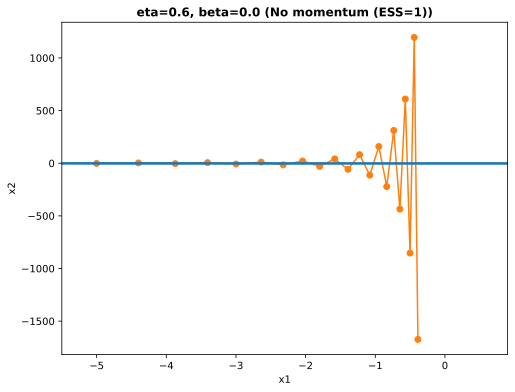


eta=0.6, beta=0.3 - Low momentum (ESS≈1.4)
  Effective step size: 0.86
epoch 20, x1: -0.084378, x2: -0.000643


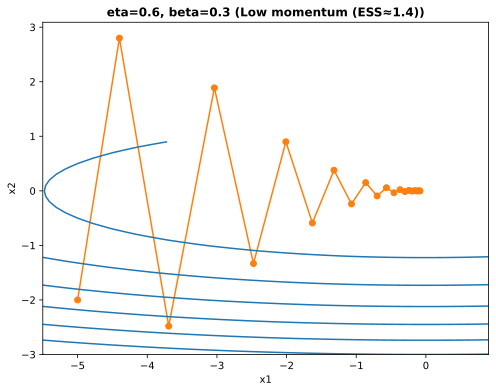


eta=0.6, beta=0.5 - Medium momentum (ESS=2)
  Effective step size: 1.20
epoch 20, x1: 0.007188, x2: 0.002553


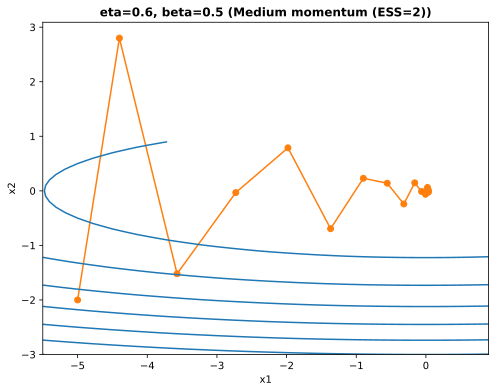


eta=0.6, beta=0.7 - Medium-high (ESS≈3.3)
  Effective step size: 2.00
epoch 20, x1: -0.147652, x2: 0.095252


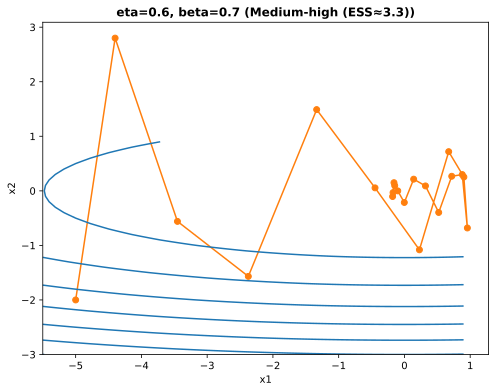


eta=0.6, beta=0.9 - High/Standard (ESS=10)
  Effective step size: 6.00
epoch 20, x1: -1.191637, x2: -1.118465


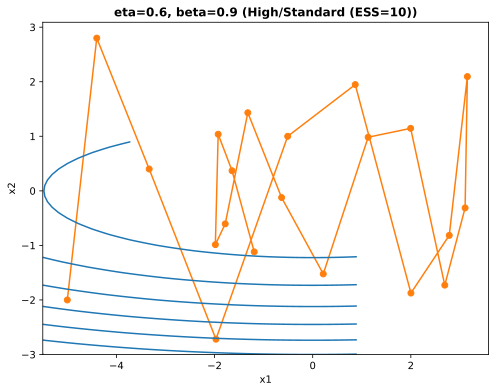


eta=0.6, beta=0.95 - Very high (ESS=20)
  Effective step size: 12.00
epoch 20, x1: -1.973514, x2: -1.417544


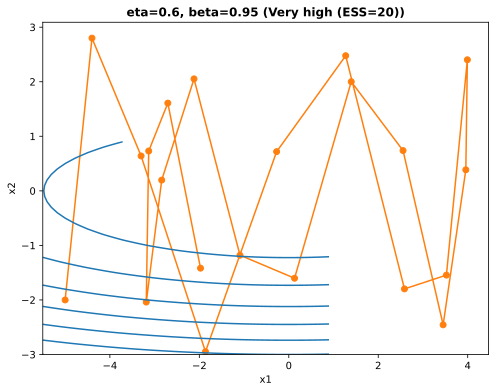


KẾT LUẬN EXPERIMENT 1:
- Beta càng cao → đường đi càng mượt, ít dao động
- Beta=0.0 dao động nhiều, đặc biệt ở hướng x2 (steep)
- Beta > 0.5 bắt đầu phân kì, bước nhảy lớn đã hất văng nghiệm ra xa điểm cực tiểu
=> Khi tăng Beta lên cao, BẮT BUỘC phải giảm Eta xuống

EXPERIMENT 2: Effect of Learning Rate (Fixed beta=0.9)
Mục đích: Với momentum cao, thử các learning rate khác nhau


eta=0.01, beta=0.9 - Very low LR
  Effective step size: 0.10
epoch 20, x1: -3.863375, x2: 0.551171


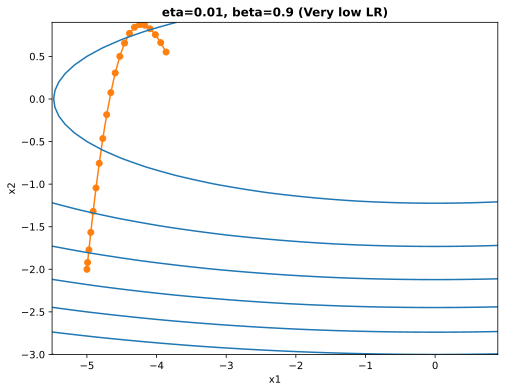


eta=0.05, beta=0.9 - Very low LR
  Effective step size: 0.50
epoch 20, x1: -0.589111, x2: 0.698505


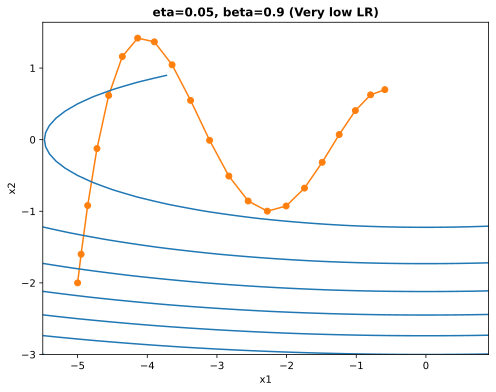


eta=0.1, beta=0.9 - Very low LR
  Effective step size: 1.00
epoch 20, x1: 1.353357, x2: -0.465813


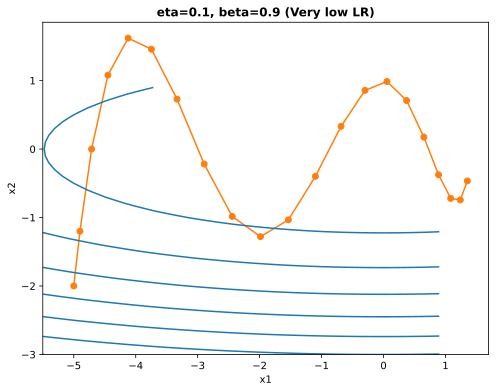


eta=0.2, beta=0.9 - Low LR
  Effective step size: 2.00
epoch 20, x1: 1.377927, x2: -0.621659


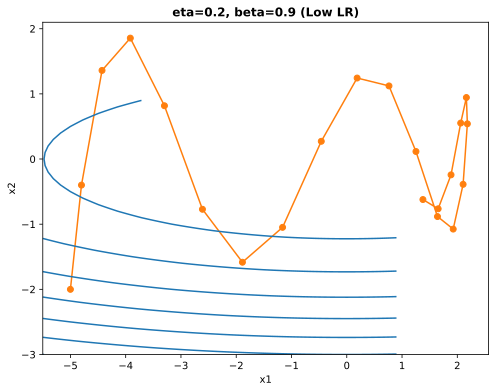


eta=0.4, beta=0.9 - Medium LR
  Effective step size: 4.00
epoch 20, x1: -1.450218, x2: 0.715940


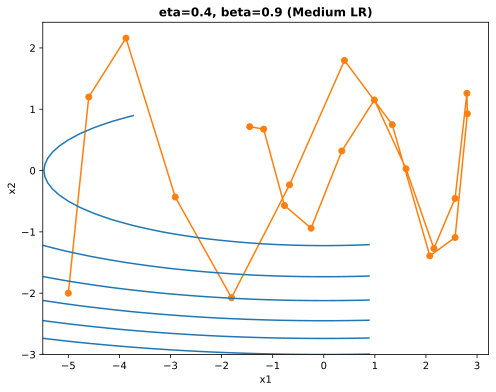


eta=0.6, beta=0.9 - High LR
  Effective step size: 6.00
epoch 20, x1: -1.191637, x2: -1.118465


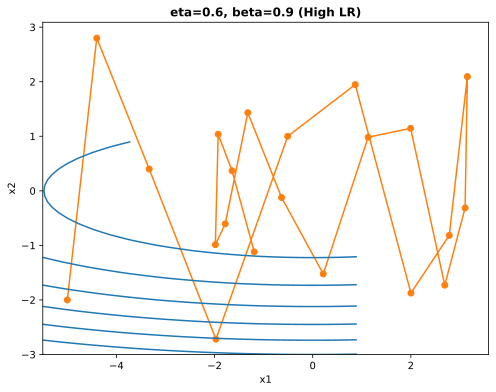


eta=0.8, beta=0.9 - Very high LR
  Effective step size: 8.00
epoch 20, x1: 0.726161, x2: 1.468998


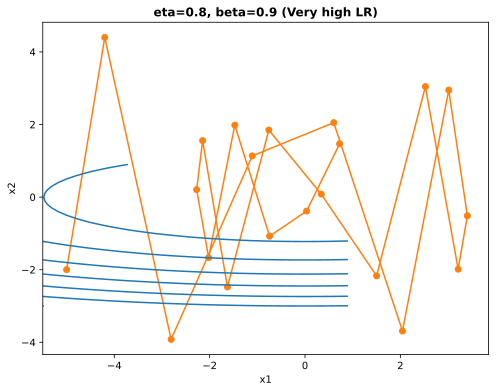


KẾT LUẬN EXPERIMENT 2:
Khi Momentum cao beta=0.9
- nếu eta=0.01 quá nhỏ, tốc độ hội tụ cực chậm
- nếu eta=0.05, hội tụ tốt, giao động ổn định
 - khi eta > 0.05, trạng thái giao động bắt đầu có dấu hiệu giao động mạnh
việc tăng Learning Rate dù rất ít(từ 0.1 lên 0.2) cũng làm tăng Effective Step Size lên gấp đôi, chuyển trạng thái từ 'dao động ổn định' sang 'dao động mạnh/kém hiệu quả'.
=> Khi tăng Beta cao 0.9, nếu eta cao thì sẽ khuếch đại dao động đáng kể, dễ gây ra giao động mạnh dẫn đến phân kỳ

EXPERIMENT 4: Best vs Worst Combinations
Mục đích: Thấy rõ cấu hình tốt và xấu


WORST: High LR + No momentum: eta=0.6, beta=0.0
  Effective step: 0.60, ESS: 1.0
epoch 20, x1: -0.387814, x2: -1673.365109


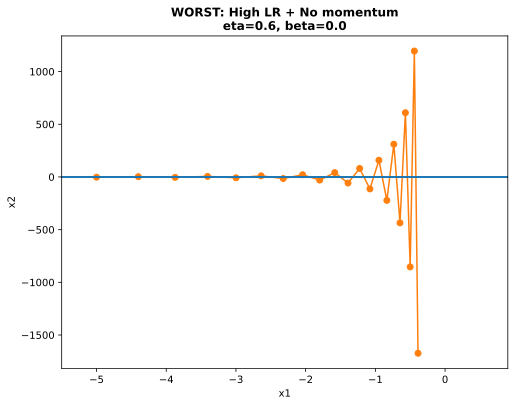


BAD: Too aggressive: eta=0.8, beta=0.9
  Effective step: 8.00, ESS: 10.0
epoch 20, x1: 0.726161, x2: 1.468998


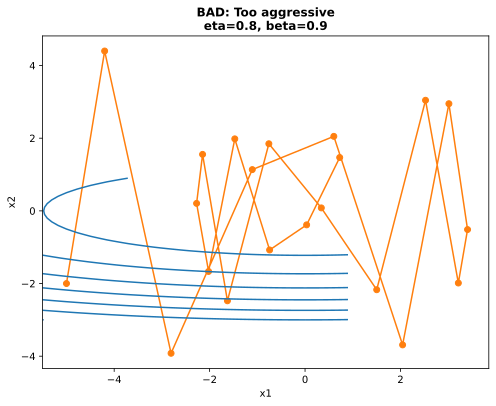


BAD: Too conservative: eta=0.1, beta=0.3
  Effective step: 0.14, ESS: 1.4
epoch 20, x1: -2.816481, x2: -0.000008


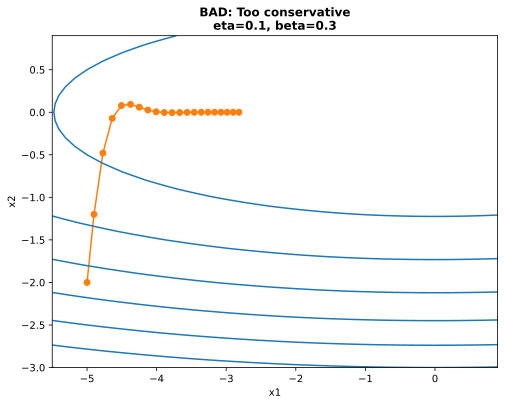


BAD: Too aggressive: eta=0.4, beta=0.9
  Effective step: 4.00, ESS: 10.0
epoch 20, x1: -1.450218, x2: 0.715940


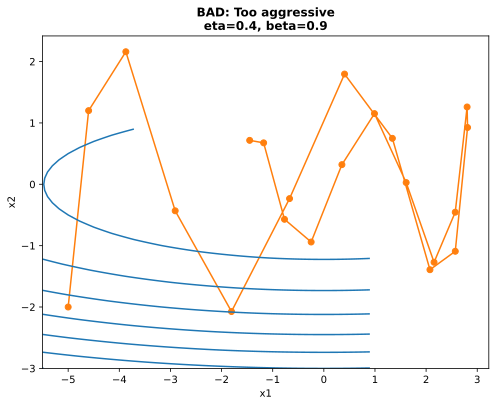


GOOD: Medium combination: eta=0.6, beta=0.5
  Effective step: 1.20, ESS: 2.0
epoch 20, x1: 0.007188, x2: 0.002553


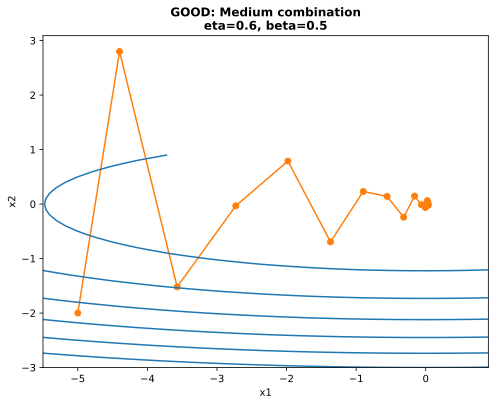


BEST: Safe and smooth: eta=0.05, beta=0.9
  Effective step: 0.50, ESS: 10.0
epoch 20, x1: -0.589111, x2: 0.698505


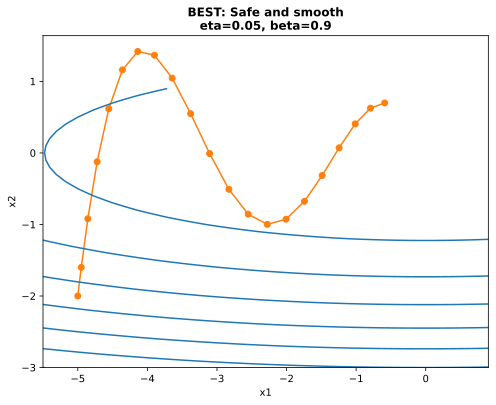


KẾT LUẬN EXPERIMENT 3:
WORST practices:
- Learning Rate cao + Không có Momentum: Dẫn đến dao động mạnh mà không hội tụ được
- eta và beta đều cao → phân kỳ

BEST practices:
- beta cao (0.9) +  eta nhỏ (< 0.6)
- Trade-off: eta↑ → beta↓ để giữ effective step hợp lý
- Với ill-conditioned problems: beta=0.9, eta <= 0.5

KẾT LUẬN TỔNG HỢP

1. MOMENTUM GIÚP:
   - Làm mịn gradient noise (tích lũy ESS gradients)
   - Tăng tốc ở hướng consistent (x1 - flat direction)
   - Giảm dao động ở hướng steep (x2 - steep direction)

2. BEST PRACTICES:
   - Bắt đầu: η=0.4, β=0.9 (effective step ≈ 4)
   - An toàn: η=0.2, β=0.9 (effective step = 2)
   - Nhanh hơn: η=0.6, β=0.9 (effective step = 6)
   - Tránh: β=0 với η cao, hoặc β và η đều cao

3. SO SÁNH VỚI SGD:
   - SGD (β=0): cần η rất nhỏ để ổn định
   - Momentum (β=0.9): có thể dùng η lớn hơn vì smooth hơn
   - Momentum hội tụ nhanh hơn VÀ ổn định hơn



In [4]:
# ============================================================
# SYSTEMATIC EXPERIMENTS FOR CLEAR CONCLUSIONS
# ============================================================
import matplotlib.pyplot as plt
from d2l import torch as d2l

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

# ============================================================
# EXPERIMENT 1: Effect of Momentum (Fixed LR)
# Kết luận: Beta tăng → mượt hơn, ESS tăng, hội tụ tốt hơn
# ============================================================
print("="*70)
print("EXPERIMENT 1: Effect of Momentum (Fixed eta=0.6)")
print("="*70)
print("Mục đích: Quan sát momentum từ 0 → 0.95, ESS từ 1 → 20")
print()

eta = 0.6
beta_experiments = [
    (0.0,  "No momentum (ESS=1)"),
    (0.3,  "Low momentum (ESS≈1.4)"),
    (0.5,  "Medium momentum (ESS=2)"),
    (0.7,  "Medium-high (ESS≈3.3)"),
    (0.9,  "High/Standard (ESS=10)"),
    (0.95, "Very high (ESS=20)"),
]

for beta, description in beta_experiments:
    print(f"\neta={eta}, beta={beta} - {description}")
    print(f"  Effective step size: {eta/(1-beta) if beta < 1 else 'inf':.2f}")
    plt.figure(figsize=(8, 6))
    d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))
    plt.title(f'eta={eta}, beta={beta} ({description})', fontsize=12, fontweight='bold')
    plt.show()

print("\nKẾT LUẬN EXPERIMENT 1:")
print("- Beta càng cao → đường đi càng mượt, ít dao động")
print("- Beta=0.0 dao động nhiều, đặc biệt ở hướng x2 (steep)")
print("- Beta > 0.5 bắt đầu phân kì, bước nhảy lớn đã hất văng nghiệm ra xa điểm cực tiểu")
print("=> Khi tăng Beta lên cao, BẮT BUỘC phải giảm Eta xuống")

# ============================================================
# EXPERIMENT 2: Effect of Learning Rate (Fixed Momentum)
# Kết luận: Với beta=0.9, cần điều chỉnh eta phù hợp
# ============================================================
print("\n" + "="*70)
print("EXPERIMENT 2: Effect of Learning Rate (Fixed beta=0.9)")
print("="*70)
print("Mục đích: Với momentum cao, thử các learning rate khác nhau")
print()

beta = 0.9
eta_experiments = [
    (0.01, "Very low LR"),
    (0.05, "Very low LR"),
    (0.1, "Very low LR"),
    (0.2, "Low LR"),
    (0.4, "Medium LR"),
    (0.6, "High LR"),
    (0.8, "Very high LR"),
]

for eta, description in eta_experiments:
    print(f"\neta={eta}, beta={beta} - {description}")
    print(f"  Effective step size: {eta/(1-beta):.2f}")
    plt.figure(figsize=(8, 6))
    d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))
    plt.title(f'eta={eta}, beta={beta} ({description})', fontsize=12, fontweight='bold')
    plt.show()

print("\nKẾT LUẬN EXPERIMENT 2:")
print("Khi Momentum cao beta=0.9")
print("- nếu eta=0.01 quá nhỏ, tốc độ hội tụ cực chậm")
print("- nếu eta=0.05, hội tụ tốt, giao động ổn định")
print(" - khi eta > 0.05, trạng thái giao động bắt đầu có dấu hiệu giao động mạnh")
print("việc tăng Learning Rate dù rất ít(từ 0.1 lên 0.2) cũng làm tăng Effective Step Size lên gấp đôi, chuyển trạng thái từ 'dao động ổn định' sang 'dao động mạnh/kém hiệu quả'.")
print("=> Khi tăng Beta cao 0.9, nếu eta cao thì sẽ khuếch đại dao động đáng kể, dễ gây ra giao động mạnh dẫn đến phân kỳ")


# ============================================================
# EXPERIMENT 3: Best vs Worst Combinations
# Kết luận: Đưa ra best practices
# ============================================================
print("\n" + "="*70)
print("EXPERIMENT 4: Best vs Worst Combinations")
print("="*70)
print("Mục đích: Thấy rõ cấu hình tốt và xấu")
print()

comparison_experiments = [
    (0.6, 0.0,  "WORST: High LR + No momentum"),
    (0.8, 0.9,  "BAD: Too aggressive"),
    (0.1, 0.3,  "BAD: Too conservative"),
    (0.4, 0.9,  "BAD: Too aggressive"),
    (0.6, 0.5,  "GOOD: Medium combination"),
    (0.05, 0.9,  "BEST: Safe and smooth"),
]

for eta, beta, label in comparison_experiments:
    print(f"\n{label}: eta={eta}, beta={beta}")
    print(f"  Effective step: {eta/(1-beta) if beta < 1 else 'inf':.2f}, ESS: {1/(1-beta):.1f}")
    plt.figure(figsize=(8, 6))
    d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))
    plt.title(f'{label}\neta={eta}, beta={beta}', fontsize=12, fontweight='bold')
    plt.show()

print("\nKẾT LUẬN EXPERIMENT 3:")
print("WORST practices:")
print("- Learning Rate cao + Không có Momentum: Dẫn đến dao động mạnh mà không hội tụ được")
print("- eta và beta đều cao → phân kỳ")
print("\nBEST practices:")
print("- beta cao (0.9) +  eta nhỏ (< 0.6)")
print("- Trade-off: eta↑ → beta↓ để giữ effective step hợp lý")
print("- Với ill-conditioned problems: beta=0.9, eta <= 0.5")

# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*70)
print("KẾT LUẬN TỔNG HỢP")
print("="*70)
print("""
1. MOMENTUM GIÚP:
   - Làm mịn gradient noise (tích lũy ESS gradients)
   - Tăng tốc ở hướng consistent (x1 - flat direction)
   - Giảm dao động ở hướng steep (x2 - steep direction)

2. BEST PRACTICES:
   - Bắt đầu: η=0.4, β=0.9 (effective step ≈ 4)
   - An toàn: η=0.2, β=0.9 (effective step = 2)
   - Nhanh hơn: η=0.6, β=0.9 (effective step = 6)
   - Tránh: β=0 với η cao, hoặc β và η đều cao

3. SO SÁNH VỚI SGD:
   - SGD (β=0): cần η rất nhỏ để ổn định
   - Momentum (β=0.9): có thể dùng η lớn hơn vì smooth hơn
   - Momentum hội tụ nhanh hơn VÀ ổn định hơn
""")

### III.2 Bài 2
Try out gradient descent and momentum for a quadratic problem where you have multiple eigenvalues, i.e.,

\begin{aligned}
f(x)=\frac{1}{2}\sum_{i}\lambda_{i}x_{i}^2, \qquad \lambda_{i}=2^{-i}
\end{aligned}

Plot how the values of $x$ decrease for the initialization $x_i=1$.

**

Ta có:

\begin{aligned}
f(x)
&=\frac{1}{2}\sum_{i}\lambda_{i}x_{i}^2, \qquad \lambda_{i}=2^{-i} \\
&=\frac{1}{2}\sum_{i} 2^{-i}x_i^2
\end{aligned}

Gọi $\mathbf{x} = [x_1, x_2,...,x_i]^\top$

Với **Gradient Descent**:

- Khởi tạo:
  \begin{aligned}
  \mathbf{x}_{0} &= [1,1,...,1]^\top \\
  \eta &= 0.1
  \end{aligned}

- Tính $\nabla f(x)$:

  \begin{aligned}
  \nabla f(x) 
  &= [
    \frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, ..., \frac{\partial f(x)}{\partial x_i}
  ]^\top \\
  &= [
    \frac{\partial (\frac{1}{2}2^{-1}x_1^2)}{\partial x_1},
    \frac{\partial (\frac{1}{2}2^{-2}x_2^2)}{\partial x_2},...,
    \frac{\partial (\frac{1}{2}2^{-i}x_i^2)}{\partial x_i},
  ]^\top \\
  &= [2^{-1}x_1, 2^{-2}x_2,..., 2^{-i}x_i]^\top
  \end{aligned}

- Vòng lặp 1:
  - Bước 1: $\nabla f(x_{0}) = [2^{-1}, 2^{-2},..., 2^{-i}]$
  - Bước 2:
    \begin{aligned}
    \mathbf{x}_1 &= \mathbf{x}_0 - \eta \nabla f(x_0) \\
    &= [1,1,...,1]^\top - 0.1[2^{-1}x_1, 2^{-2}x_2,..., 2^{-i}x_i]^\top \\
    &= [0.95, 0.975,...,1 - 0.1 \cdot 2^{-i}]
    \end{aligned}

**Nhận xét**: điểm tối ưu sẽ là vector $\mathbf{x}^*=[0, 0, ..., 0]^\top$

Phương pháp Gradient Descent sẽ làm cho các vị trí $x_i$ với $i$ lớn sẽ về điểm $\mathcal O$ rất lâu.<br>
Nếu $i \rightarrow \infty$, thậm chí còn không di chuyển.

**


Với **Momentum**:

- Khởi tạo:
  \begin{aligned}
  \beta &= 0.5 \\
  \eta &= 0.1 \\
  \mathbf{v}_0 &= [0,0,...,0]^\top \\
  \mathbf{x}_0 &= [1,1,...,1]^\top
  \end{aligned}

- Tính $\nabla f(x) = [2^{-1}x_1, 2^{-2}x_2,..., 2^{-i}x_i]^\top$:

- Vòng lặp 1:

  \begin{aligned}
  \nabla f(x_{0}) &= [2^{-1}, 2^{-2},..., 2^{-i}]^\top \\
  \\
  \mathbf{v}_1 
  &= \beta \mathbf{v}_0 + \nabla f(x_0) \\
  &= 0.5[0,0,...,0]^\top + [2^{-1}, 2^{-2},..., 2^{-i}]^\top \\
  &= [2^{-1}, 2^{-2},..., 2^{-i}]^\top \\
  &= [\lambda_{1},\lambda_{2},...,\lambda_{i}]^\top \\
  \\
  \mathbf{x}_1
  &= \mathbf{x}_0 - \eta \mathbf{v}_1 \\
  &= [1,1,...,1]^\top - 0.1[2^{-1}, 2^{-2},..., 2^{-i}]^\top \\
  &= [0.95, 0.975,..., 1 - 0.1 \cdot 2^{-i}]^\top \\
  &= [1-0.1\lambda_{1}, 1-0.1\lambda_{2}, ..., 1-0.1\lambda_{i}]^\top
  \end{aligned}

- Vòng lặp 2:

  \begin{aligned}
  \nabla f(x_{1}) 
  &= [\lambda_{1}(1-0.1\lambda_{1}), \lambda_{2}(1-0.1\lambda_{2}), ..., \lambda_{i}(1-0.1\lambda_{i})]^\top \\
  &= [\lambda_{1} - 0.1\lambda_{1}^2, \lambda_{2} - 0.1\lambda_{2}^2, ..., \lambda_{i} - 0.1\lambda_{i}^2]^\top
  \\
  \mathbf{v}_2
  &= \beta \mathbf{v}_1 + \nabla f(x_1) \\
  &= 0.5[\lambda_{1},\lambda_{2},...,\lambda_{i}]^\top + [\lambda_{1} - 0.1\lambda_{1}^2, \lambda_{2} - 0.1\lambda_{2}^2, ..., \lambda_{i} - 0.1\lambda_{i}^2]^\top \\
  &= [1.5\lambda_{1}-0.1\lambda_{1}^2, 1.5\lambda_{2}-0.1\lambda_{2}^2,...,1.5\lambda_{i}-0.1\lambda_{i}^2]^\top \\
  \\
  \mathbf{x}_2
  &= \mathbf{x}_1 - \eta \mathbf{v}_2 \\
  &= [1-0.1\lambda_{1}, 1-0.1\lambda_{2}, ..., 1-0.1\lambda_{i}]^\top - 0.1[1.5\lambda_{1}-0.1\lambda_{1}^2, 1.5\lambda_{2}-0.1\lambda_{2}^2,...,1.5\lambda_{i}-0.1\lambda_{i}^2]^\top \\
  &= [1-0.25\lambda_{1}-0.01\lambda_{1}^2, 1-0.25\lambda_{2}-0.01\lambda_{2}^2, ..., 1-0.25\lambda_{i}-0.01\lambda_{i}^2]^\top
  \end{aligned}

**Nhận xét:**

Khi $i \rightarrow \infty$, lúc này tốc độ tiền về điểm tối ưu của biến $x_i$ cải thiện hơn so với phương pháp Gradient Descent.

<!-- ############################################################################################### -->

### III.3 Bài 3
Derive minimum value and minimizer for $h(\mathbf{x})=\frac{1}{2} \mathbf{x}^\top\mathbf{Q}\mathbf{x} + \mathbf{x}^\top\mathbf{c} + b$

**

\begin{aligned}
h(\mathbf{x})=\frac{1}{2} \mathbf{x}^\top\mathbf{Q}\mathbf{x} + \mathbf{x}^\top\mathbf{c} + b,
\qquad Q \in \mathbb{R}^{n \times n};
\mathbf{x}, \mathbf{c} \in \mathbb{R}^n;
b \in \mathbb{R}
\tag{4.2.1}
\end{aligned}

Mục tiêu: tìm điểm tối ưu và giải bằng Momentum đúng theo d2l.ai (dùng công thức tích lũy momentum dạng EMA và cập nhật tham số có learning rate $\eta$).

Trong đó, 

\begin{aligned}
\mathbf{x}^\top &= [x_1, x_2, ..., x_n]^\top 
\Rightarrow \mathbf{x} = 
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix}
\\
\mathbf{c} &= \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_n \end{bmatrix}
\\
\mathbf{Q} &= \begin{bmatrix}
  Q_{11} & Q{12} & \cdots & Q_{1n} \\
  Q_{21} & Q{22} & \cdots & Q_{2n} \\
  \vdots & \vdots & \ddots & \vdots \\
  Q_{n1} & Q{n2} & \cdots & Q_{nn}
\end{bmatrix}
\end{aligned}

#### 1. Gradient của hàm
##### Xét $\mathbf{x}^\top\mathbf{Q}\mathbf{x}$

Theo định nghĩa ma trận $(\mathbf{Q}\mathbf{x})_i = \sum_{j=1}^n \mathbf{Q}_{ij}\mathbf{x}_j$,
nghĩa là: $\mathbf{Q}\mathbf{x} = \begin{bmatrix} \sum_{j=1}^n \mathbf{Q}_{1j}\mathbf{x}_j \\ \sum_{j=1}^n \mathbf{Q}_{2j}\mathbf{x}_j \\ \vdots \\ \sum_{j=1}^n \mathbf{Q}_{nj}\mathbf{x}_j \end{bmatrix}$

$$\Rightarrow \mathbf{x}^\top Q\mathbf{x} = \sum_{i=1}^n \sum_{j=1}^n \mathbf{x}_i Q_{ij} \mathbf{x}_j, \qquad \mathbf{x}^\top \mathbf{c}=\sum_{i=1}^n \mathbf{x}_i c_i$$

Lấy đạo hàm riêng theo biến k. Ta quan sát hai tường hợp khi $\mathbf{x}_k$ xuất hiện trong hai trường hợp:

-  Nếu $(i = k)$ thì hạng tử có dạng $(\mathbf{x}_k Q_{kj} \mathbf{x}_j)$ → đạo hàm theo $(\mathbf{x}_k)$ cho $(Q_{kj} \mathbf{x}_j)$

-  Nếu $(j=k)$, hạng tử có dạng $(\mathbf{x}_i Q_{ik} \mathbf{x}_k)$ → đạo hàm theo $(\mathbf{x}_k)$ cho $(\mathbf{x}_i Q_{ik})$.

Do đó
$$\frac{\partial}{\partial \mathbf{x}_k}\left(\tfrac12\sum_{i,j} \mathbf{x}_i Q_{ij} \mathbf{x}_j\right)=\tfrac12\sum_{j} Q_{kj} \mathbf{x}_j + \tfrac12\sum_{i} \mathbf{x}_i Q_{ik}$$

Cộng phần từ $(\mathbf{x}^\top\mathbf{c})$ và hằng số, ta được
$$
\frac{\partial h}{\partial \mathbf{x}_k}=\tfrac12\sum_j Q_{kj}\mathbf{x}_j + \tfrac12\sum_i \mathbf{x}_i Q_{ik} + c_k
$$

Viết gọn bằng ma trận (chú ý $(Q^\top_{kj}=Q_{jk})$):
$$\nabla h(\mathbf{x})=\tfrac12(Q+Q^\top)\mathbf{x}+\mathbf{c}$$
Khi (Q) đối xứng (thường là giả thiết cho quadratic form), $(Q=Q^\top)$ và

$$
\boxed{\nabla h(\mathbf{x})=Q\mathbf{x}+\mathbf{c}}
\tag{4.2.2}
$$

#### 2. Nghiệm đóng

Điều kiện điểm tới hạn:
$$
\nabla h(\mathbf{x}^*)=0\quad
\iff \quad Q\mathbf{x}^* + \mathbf{c}=0
\iff \quad Q\mathbf{x}^* = \mathbf{-c}
$$

Nếu $(\mathbf{Q})$ khả nghịch (invertible - $\mathbf{Q}$ * $\mathbf{Q}^{-1}$ = I), nhân hai vế với $(\mathbf{Q}^{-1})$ ta có:
$$
\mathbf Q^{-1} \mathbf{Q} \mathbf{x}^* = \mathbf{-c}
$$

$$
\boxed{\mathbf{x}^*=-\mathbf{Q}^{-1}\mathbf{c}}
\tag{4.2.3}
$$

Giá trị tối thiểu:

$$
h(\mathbf{x}^*) =\tfrac12(\mathbf{x}^*)^\top \mathbf{Q}\mathbf{x}^* + (\mathbf{x}^*)^\top \mathbf{c} + b
$$

Thay $\mathbf{x}^*$ = $\mathbf{-Q}^{-1}\mathbf{c}$, ta có:

\begin{aligned}
h(\mathbf{-Q}^{-1}\mathbf{c})
  &=\tfrac12(\mathbf{-Q}^{-1}\mathbf{c})^\top \mathbf{Q}(\mathbf{-Q}^{-1}\mathbf{c}) + (\mathbf{-Q}^{-1}\mathbf{c})^\top \mathbf{c} + b \\
  &=\tfrac12\mathbf{c}^\top\mathbf{Q}^{-1}\mathbf{c} - \mathbf{c}^\top\mathbf{Q}^{-1} \mathbf{c} + b \\
  &= b - \tfrac12\mathbf{c}^\top \mathbf{Q}^{-1}\mathbf{c}
\end{aligned}



#### 3. Áp dụng Momentum cho bài toán Quadratic

- Thiết lập notation:
  
  * Ta đã có: $\nabla h(\mathbf{x}) = Q\mathbf{x}+\mathbf{c}$
  * Do đó ở bước $t$, ta có: $\mathbf{g}_t = Q\mathbf{x}_t + \mathbf{c}$

- Chọn tham số:

  *	hệ số momentum $(\beta\in[0,1))$ (thường là 0.9)
  *	learning rate $(\eta>0)$ chọn sao cho ổn định
  *	khởi tạo $(\mathbf{x}_0)$ (tùy ý), $(\mathbf{v}_0=0)$.

- Lặp cho t = 0,1,2,...:

  1. Tính gradient: $(\mathbf{g}_t = Q\mathbf{x}_t + \mathbf{c})$
  2. Tích lũy momentum: $(\mathbf{v}_{t+1} = \beta\mathbf{v}_t + \mathbf{g}_t)$
  3. Cập nhật tham số: $(\mathbf{x}_{t+1} = \mathbf{x}_t - \eta_t\mathbf{v}_{t+1})$

- Tại sao thuật toán tìm về nghiệm đóng:

  * Điểm dừng (nếu hội tụ) là $(\mathbf{x}_{t+1} = \mathbf{x}_t = \mathbf{x}^*)$, và theo đó $(\mathbf{v}_{t+1}=\mathbf{v}_t = \mathbf{v}^*)$ và $(\mathbf{g}_t=\mathbf{g}^* = Q \mathbf{x}^* + \mathbf{c})$.

  * Từ quy luật tích lũy:
  $$\mathbf{v}^* = \beta\mathbf{v}^* + \mathbf{g}^* \quad\Rightarrow\quad (1-\beta)\mathbf{v}^* = \mathbf{g}^*$$

  * Từ quy luật cập nhật ($\mathbf{x}$) và $(\mathbf{x}_{t+1} = \mathbf{x}_t = \mathbf{x}^*)$,  $(\mathbf{v}_{t+1}=\mathbf{v}_t = \mathbf{v}^*)$
  ta có:
  \begin{aligned}
  &\mathbf{x}_{t} = \mathbf{x}_t - \eta_t\mathbf{v}_{t}^* \quad \\
  &\iff -\eta\mathbf{v}^* = 0 \quad \Rightarrow \quad \mathbf{v}^* = 0
  \end{aligned}

  * Kết hợp hai phương trình trên cho ta $(\mathbf{g}^*=0)$. Do đó:
  $$Q\mathbf{x}^* + \mathbf{c} = 0 \quad \Rightarrow \quad \mathbf{x}^* = -Q^{-1} \mathbf{c}$$

(nếu (Q) khả nghịch).

Vì vậy nghiệm hội tụ của thuật toán (nếu hội tụ về điểm cố định) là nghiệm đóng đã biết.

#### 4. Giá trị nhỏ nhất

Khi $(\mathbf{x}^* = -Q^{-1} \mathbf{c})$

Giá trị nhỏ nhất là:
$h(\mathbf{x}^*) = b - \tfrac12\mathbf{c}^\top Q^{-1}\mathbf{c}$

#### 5. Tóm tắt

- Gradient:
$$(\nabla h(\mathbf{x}) = Q\mathbf{x} + \mathbf{c})$$

- Momentum (d2l):
$$\mathbf{v}_t= \beta \mathbf{v}_{t-1} + \mathbf{g}_{t-1}, \quad \mathbf{x}_t=\mathbf{x}_{t-1} - \eta \mathbf{v}_t$$

- Nghiệm đóng (nếu Q khả nghịch):
$$\mathbf{x}^* = -Q^{-1} \mathbf{c}$$

- Giá trị nhỏ nhất:
$$h(\mathbf{x}^*) =b - \tfrac12 \mathbf{c}^\top Q^{-1} \mathbf{c}$$

#### 6. Python Implementation

Analytic solution:
 x* = [ 2. -2.]
 h(x*) = -8.0

Running d2l-style Momentum:
t= 0 | x=[0. 0.] | v=[0. 0.] | g=[-6.  2.] | h(x)=0.000000
t= 1 | x=[ 0.6 -0.2] | v=[-6.  2.] | g=[-4.2  1.8] | h(x)=-3.440000
t= 2 | x=[ 1.56 -0.56] | v=[-9.6  3.6] | g=[-1.32  1.44] | h(x)=-6.672800
t= 3 | x=[ 2.556 -1.028] | v=[-9.96  4.68] | g=[1.668 0.972] | h(x)=-7.063904
t= 4 | x=[ 3.2856 -1.5464] | v=[-7.296  5.184] | g=[3.8568 0.4536] | h(x)=-5.417972
t= 5 | x=[ 3.55656 -2.05832] | v=[-2.7096  5.1192] | g=[ 4.66968 -0.05832] | h(x)=-4.363981
t= 6 | x=[ 3.333456 -2.513216] | v=[2.23104 4.54896] | g=[ 4.000368 -0.513216] | h(x)=-5.201147
t= 7 | x=[ 2.732626 -2.871301] | v=[6.008304 3.580848] | g=[ 2.197877 -0.871301] | h(x)=-6.815307
t= 8 | x=[ 1.972091 -3.106447] | v=[7.60535  2.351462] | g=[-0.083728 -1.106447] | h(x)=-7.386719
t= 9 | x=[ 1.295982 -3.207434] | v=[6.761087 1.009869] | g=[-2.112054 -1.207434] | h(x)=-6.527589
t=10 | x=[ 0.898689 -3.177579] | v=[ 3.972924 -0.298552] | g=[-3.303932 -1.17

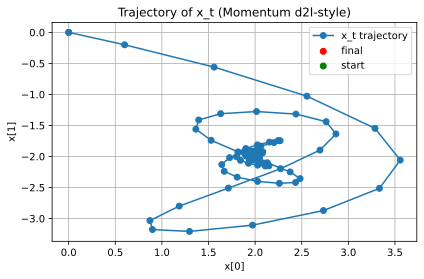

In [5]:
# solve_quadratic_momentum.py
#
#Giải bài toán tối ưu hàm bậc hai theo phong cách d2l.ai và chạy Momentum (d2l-style).

#Nội dung tham chiếu gốc (markdown) đã được chuyển thành code và hàm tương ứng.
#(Reference: user's uploaded markdown). :contentReference[oaicite:1]{index=1}

#Sử dụng: Có thể chỉnh Q, c, x0, beta, eta, steps

#File sẽ:
#- in nghiệm đóng (analytical) x_star và h(x_star)
#- chạy thuật toán Momentum theo d2l:
#    g_t = Q x_t + c
#    v_{t+1} = beta * v_t + g_t
#    x_{t+1} = x_t - eta * v_{t+1}
#- xuất bảng tra cứu các bước ra CSV: momentum_steps.csv
#- (tùy chọn) vẽ quỹ đạo x_t nếu matplotlib có sẵn

import numpy as np
import pandas as pd

# TÍNH GIÁ TRỊ HÀM
def h_value(x, Q, c, b=0.0):
    """Compute h(x) = 1/2 x^T Q x + x^T c + b"""
    x = np.atleast_1d(x)
    return 0.5 * float(x.T @ (Q @ x)) + float(x.T @ c) + float(b)

# TÌM NGHIỆM ĐÚNG
def analytic_minimizer(Q, c):
    """Return analytic minimizer x* = -Q^{-1} c (if Q invertible)"""
    Q = np.atleast_2d(Q)
    c = np.atleast_1d(c)
    if Q.shape[0] != Q.shape[1]:
        raise ValueError("Q must be square")
    try:
        Qinv = np.linalg.inv(Q)
    except np.linalg.LinAlgError:
        raise np.linalg.LinAlgError("Q is singular; inverse does not exist")
    x_star = - Qinv @ c
    return x_star

#THỰC HIỆN MOMENTUM
def momentum_d2l(Q, c, x0, beta=0.9, eta=0.1, steps=50, b=0.0, verbose=False):
    """
    Run d2l-style Momentum on quadratic h(x) = 1/2 x^T Q x + x^T c + b
    - g_t = Q x_t + c
    - v_{t+1} = beta v_t + g_t
    - x_{t+1} = x_t - eta * v_{t+1}
    Returns:
      xs: list of x vectors from t=0..steps
      vs: list of v vectors from t=0..steps (v_0 included)
      gs: list of g vectors from t=0..steps-1
    """
    #KHỞI TẠO
    Q = np.atleast_2d(Q)
    c = np.atleast_1d(c)
    x = np.atleast_1d(x0).astype(float).copy()
    n = Q.shape[0]
    if x.shape[0] != n or c.shape[0] != n:
        raise ValueError("Dimension mismatch: Q is %sx%s, x,c must be length %s" % (n,n,n))

    #TẠO DANH SÁCH ĐỂ LƯU QUÁ TRÌNH
    xs = [x.copy()]
    vs = [np.zeros(n)]
    gs = []

    v = np.zeros(n)
    for t in range(steps):
        g = Q @ x + c   # gradient at x_t
        gs.append(g.copy())
        v = beta * v + g
        x = x - eta * v
        vs.append(v.copy())
        xs.append(x.copy())
        if verbose:
            print(f"t={t:2d}: x={x}, v={v}, g={g}")
    return np.array(xs), np.array(vs), np.array(gs)

#LƯU TOÀN BỘ QUỸ ĐẠO TỐI ƯU HÓA RA CSV
def save_steps_csv(xs, vs, gs, filename="momentum_steps.csv"):
    """Save trajectory to CSV with columns: t, x0, x1, v0, v1, g0, g1"""
    rows = []
    steps = xs.shape[0] - 1
    for t in range(steps+1):
        x_t = xs[t]
        v_t = vs[t]
        g_t = gs[t] if t < gs.shape[0] else np.array([np.nan]*x_t.size)
        row = {"t": t}
        for i in range(x_t.size):
            row[f"x_{i}"] = float(x_t[i])
            row[f"v_{i}"] = float(v_t[i]) if not np.isnan(v_t[i]) else ""
            row[f"g_{i}"] = float(g_t[i]) if not np.isnan(g_t[i]) else ""
        rows.append(row)
    df = pd.DataFrame(rows)
    df.to_csv(filename, index=False)
    return filename, df

#HÀM DEMO
def demo_example():
    """Run the example from the conversation (2x2 Q) and print results"""
    Q = np.array([[3.0, 0.0], [0.0, 1.0]])
    c = np.array([-6.0, 2.0])
    b = 0.0

    x0 = np.array([0.0, 0.0])
    beta = 0.9
    eta = 0.1
    steps = 100

    print("Analytic solution:")
    x_star = analytic_minimizer(Q, c)
    print(" x* =", x_star)
    print(" h(x*) =", h_value(x_star, Q, c, b))

    print("\nRunning d2l-style Momentum:")
    xs, vs, gs = momentum_d2l(Q, c, x0, beta=beta, eta=eta, steps=steps, b=b, verbose=False)

    # Print a short table
    for t in range(xs.shape[0]):
        x_t = xs[t]
        v_t = vs[t]
        g_t = gs[t] if t < gs.shape[0] else np.array([np.nan, np.nan])
        print(f"t={t:2d} | x={x_t.round(6)} | v={v_t.round(6)} | g={np.round(g_t,6)} | h(x)={h_value(x_t, Q, c, b):.6f}")

    fname, df = save_steps_csv(xs, vs, gs, filename="momentum_steps.csv")
    print(f"\nSaved trajectory to {fname} (also returned as pandas DataFrame).")
    return xs, vs, gs, df

if __name__ == "__main__":
    # If run as script, execute demo
    xs, vs, gs, df = demo_example()
    # Optionally: plot if matplotlib available
    try:
        import matplotlib.pyplot as plt
        xs_arr = np.array(xs)
        plt.figure(figsize=(6,4))
        plt.plot(xs_arr[:,0], xs_arr[:,1], '-o', label='x_t trajectory')
        plt.scatter([xs_arr[-1,0]],[xs_arr[-1,1]], color='red', label='final')
        plt.scatter([xs_arr[0,0]],[xs_arr[0,1]], color='green', label='start')
        plt.xlabel('x[0]')
        plt.ylabel('x[1]')
        plt.title('Trajectory of x_t (Momentum d2l-style)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception:
        pass



<!-- ######################################################################################################### -->

### III.4. Bài 4
What changes when we perform stochastic gradient descent with momentum? What happens when we use minibatch stochastic gradient descent with momentum? Experiment with the parameters?

#### What changes when we perform stochastic gradient descent with momentum?
##### Có thay đổi gì nếu ta sử dụng SGD với Momentum?


Trước hết, cần phải nhắc lại Stochastic Gradient Descent (SGD) là gì?
SGD thực ra là GD đã được cải tiến về hiệu năng.
Nếu GD thông thường, hay gọi là Batch Gradient Descent, khi tính gradient của hàm mục tiêu tại $\mathbf{x}$ sẽ là: <br>

\begin{align}
\nabla f(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^{n} \nabla f_i(\mathbf{x}) \tag{D2L 12.4.2}
\end{align}

thì GD sẽ có độ phức tạp tính toán là O(n) cho mỗi iteration, nên SGD giúp giải quyết độ phức tạp tính toán này bằng cách: <br>
1. Chọn ngẫu nhiên một mẫu dữ liệu từ vị trí $i \in \{1,...,n\}$.
2. Tính gradient của mẫu ngẫu nhiên đó để cập nhật $\mathbf{x}$.

\begin{align}
\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x}) \tag{D2L 12.4.3}
\end{align}

Trong đó, người ta muốn nhấn mạnh rằng SGD $\nabla f_i(\mathbf{x})$ là một "unbiased estimate" của full GD.<br>
Tuy nhiên, khi sử dụng SGD, người ta mong muốn có thể giảm được chi phí tính toán lớn trên toàn bộ điểm dữ liệu, nên có thể xem stochastic gradient gần đúng bằng kỳ vọng trung bình của toàn bộ gradient. <br>
Ở đó, $\nabla f_i(\mathbf{x})$ còn được xem là điểm gây nhiễu mạnh vì chỉ tính trên một sample ngẫu nhiên, có thể gây ra sai số mạnh, vì ý tưởng của SGD coi **gradient ở mỗi bước** đều quan trọng như nhau.<br>
Trong nhiều trường hợp bị nhiễu, loss function có thể sẽ hội tụ chậm hơn và di chuyển mạnh theo đường zig-zag.
<br><br>
Ví dụ: ta có chuỗi gradient như sau:

| $\nabla f_1$ | $\nabla f_2$ | $\nabla f_3$ | $\nabla f_4$ | $\nabla f_5$ |
| --- | --- | --- | --- | --- |
| 50 | 47 | 52 | **500** | 49 |
| | | | **Nhiễu** | |

Nên, nếu dùng với "động lượng" (momentum) - một động lượng tích lũy từ nhiều bước trước, giúp giảm dao động, và tăng tốc theo hướng có lợi. Mometum **trung bình hóa có trọng số theo thời gian**, nên nhiễu cao bất thường sẽ bị đè xuống bởi quá khứ.

Công thức như sau: <br>

$$ \mathbf{v} \leftarrow \beta \mathbf{v} + (1 - \beta) \nabla f_i(\mathbf{x}) $$
$$ \mathbf{x} \leftarrow \mathbf{x} - \eta \mathbf{v} $$

Trong trường hợp không chuẩn hóa momentum, hoặc đơn giản hơn, ta có:

$$ \mathbf{v} \leftarrow \beta \mathbf{v} + \nabla f_i(\mathbf{x}) $$
$$ \mathbf{x} \leftarrow \mathbf{x} - \eta \mathbf{v} $$

Thì với $\beta = 0.9$, ta có: $v_4 = 0.9 v_3 + 500$, nhưng thực ra $v_3$ đã là lịch sử được làm mượt, tức là đã bao gồm các tính toán ở bước 2, bước 1,... nên nhiễu 500 sẽ không kéo toàn bộ $v_t$ lên quá cao.

--

Qua đó, có thể thấy, momentum ở đây mang cơ chế lọc nhiễu (**Moving Average**), chứ không khuếch đại nhiễu. <br>
Nếu viết momentum theo dạng unfolded, ta có: <br>
$v_t = g_t + \beta g_{t-1} + \beta^2 g_{t-2} + \beta^3 g_{t-3} + ...$ <br>

- Nhiễu 500 xuất hiện một lần, được nhân với trọng số 1 ($g_t$).
- Trong khi 50, 47, 52 xuất hiện nhiều lần, với các trọng số $\beta, \beta^2, \beta^3$.

Vai trò của quá khứ lớn hơn vài trò của một sai số đơn lẻ.

--

Vậy nếu chỉ xét trong trường hợp SGD nhiễu mạnh, momentum giúp ổn định, giảm nhiểu, giảm tác động của những điểm gradient quá lớn, vì nó không dựa 100% vào gradient hiện tại mà dựa vào tích lũy quá khứ.

~~

#### What happens when we use minibatch stochastic gradient descent with momentum?
##### Có gì xảy ra khi sử dụng minibatch SGD với Momentum?

Như đã đề cập, Stochastic Gradient Descent được thiết kế với ý tưởng xem các gradient quan trọng như nhau, và để giảm chi phí tính toán trên toàn bộ điểm dữ liệu như Full Gradient, thì SGD chỉ tính gradient tức thời tại một sample ngẫu nhiên.

Tuy vậy, có thể sẽ gây ra nhiễu mạnh, nên một ý tưởng "lai" giữa full batch gradient với SGD gọi là **Minibatch SGD**, tức là: 
- thay vì chỉ tính gradient tức thời tại một điểm sample ngẫu nhiên,
- cũng không tính trên toàn bộ điểm dữ liệu tránh chi phí tính toán lớn

$\rightarrow$ tính trung bình các gradient của một "lô" điểm ngẫu nhiên, ví dụ 2, 4, 8, 16, 32,... điểm ngẫu nhiên để vừa giảm chi phí tính toán (Full GD) và tránh nhiễu mạnh (SGD).

Nếu chỉ xét trên Minibatch SGD, gradient đã ổn định hơn SGD thông thường nhiều. Tuy nhiên, đôi khi vẫn có thể bị ảnh hưởng với nhiễu nếu dùng batch nhỏ.

Mở rộng với ví dụ ở phần trên:

| $\nabla f_1$ | $\nabla f_2$ | $\nabla f_3$ | $\nabla f_4$ | $\nabla f_5$ | $\nabla f_6$ | $\nabla f_7$ | $\nabla f_8$ | $\nabla f_9$ | $\nabla f_{10}$ |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 50 | 47 | 52 | **500** | 49 | 48 | 50 | **400** | 47 | 51 |
| | | | **Nhiễu** | | | | **Nhiễu** | | |

Nếu dùng batch nhỏ như batch = 2 hoặc batch = 4, sample ngẫu nhiên đều rơi vào nhiễu (500, 400) thì hướng di chuyển sẽ có dao động mạnh, zig-zag nhiều, có điều sẽ "mượt" hơn SGD thuần nhiều.

Về mặt toán học, Minibatch SGD sẽ lấy một mini-batch $\mathcal B_t$ gồm $b$ mẫu ngẫu nhiên: <br>
$$ \mathbf{g}_t \leftarrow \frac{1}{\mathcal B_t} \sum_{i \in \mathcal B_t} \nabla f_i(\mathbf{x}_t) $$
$$ \mathbf{x}_{t+1} \leftarrow \mathbf{x}_t - \eta \mathbf{g}_t $$

Nếu batch_size = 4, ví dụ chọn ngẫu nhiên $\mathcal B_t = \{1,4,7,8\}$ <br>
thì: $\mathcal g_t = \frac {50+500+50+400}{4} = 250$ <br>

Nhận xét:
- So với SGD nếu chọn ngẫu nhiên rơi vào index 4 hoặc 8, $\mathbf g_t = 500$ hoặc $\mathbf g_t = 400 \rightarrow$ nhiễu mạnh.
- Mini-batch SGD với batch_size=4 đã kéo nhiễu xuống còn 250.

--

Mini-batch SGD thêm Momentum, thêm một "động lượng" tích lũy:

$$ \mathbf v_t \leftarrow \beta \mathbf v_{t-1} + \mathbf g_t $$
$$ \mathbf{x}_{t+1} \leftarrow \mathbf{x}_t - \eta \mathbf{v}_t $$

Như đã đề cập ở trên, momentum không làm khuếch đại nhiễu, mà giúp ổn định, kiềm nhiễu lại.<br>
Kết hợp với mini-batch vốn đã giảm nhiễu nhờ trung bình hóa gradient rồi, momentum càng làm mượt đường di chuyển hơn.<br>
Đồng thời, còn giúp tăng tốc theo hướng đúng, nhờ vận tốc tích lũy trong quá khứ, thay vì bị lệch bởi điểm bất thường.

--

Kết quả:
- Minibatch SGD giảm phương sai ngắn hạn, momentum lọc dao động còn lại, làm mượt đường di chuyển hơn SGD thông thường.
- Giảm zig-zag mạnh, hội tụ nhanh hơn.
- Ổn định hơn trong các rãnh hẹp.

#### Experiment with the parameters?

Thực hành thí nghiệm với hàm số sau:

$$ f(x) = x^2 + 10sin(x) $$

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

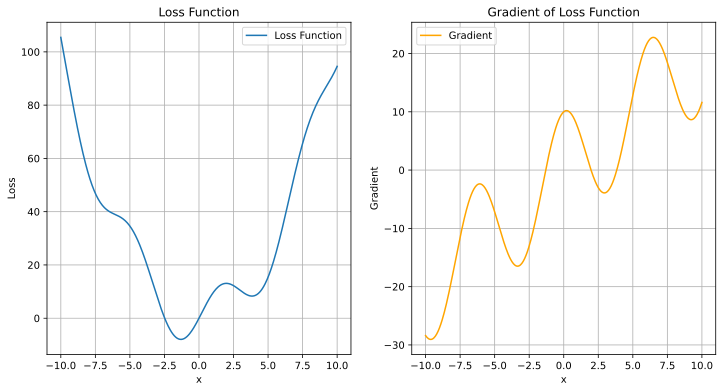

In [7]:
def loss_function(x, b=10):
    return x**2 + b * torch.sin(x)

def gradient(x, b=10):
    return 2 * x + b * torch.cos(x)

# Plotting the loss function and its gradient
x = torch.linspace(-10, 10, 400)
y = loss_function(x)
dy = gradient(x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), y.numpy(), label='Loss Function')
plt.title('Loss Function')
plt.xlabel('x')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x.numpy(), dy.numpy(), label='Gradient', color='orange')
plt.title('Gradient of Loss Function')
plt.xlabel('x')
plt.ylabel('Gradient')
plt.grid()
plt.legend()

plt.show()

In [8]:
print(len(x))

# check convergence
def has_converged(x_new, grad):
    return np.linalg.norm(grad(x_new))/len(x_new) < 1e-3

def gradient_descent(x_zero, learning_rate=0.01, max_iters=100):
    x = torch.tensor(x_zero, requires_grad=True)
    history = [x.item()]
    
    for i in range(max_iters):
        loss = loss_function(x)
        loss.backward()
        with torch.no_grad():
            x_new = x - learning_rate * x.grad
        if has_converged(x_new.numpy(), lambda x: gradient(torch.tensor(x)).numpy()):
            break
        x = x_new.clone().detach().requires_grad_(True)
        history.append(x.item())

    return x, history

def stochastic_gradient_descent(x_zero, learning_rate=0.01, max_iters=100, batch_size=1):
    x = torch.tensor(x_zero, requires_grad=True)
    n = len(x_zero)
    history = [x.item()]
    
    for i in range(max_iters):
        indices = torch.randperm(n)[:batch_size]
        x_batch = x[indices]
        
        loss = loss_function(x_batch).mean()
        loss.backward()
        
        with torch.no_grad():
            x_new = x - learning_rate * x.grad
        if has_converged(x_new.numpy(), lambda x: gradient(torch.tensor(x)).numpy()):
            break
        x = x_new.clone().detach().requires_grad_(True)
        history.append(x.item())

    return x, history

def sgd_momentum(x_zero, learning_rate=0.01, max_iters=100, batch_size=1, momentum=0.9):
    x = torch.tensor(x_zero, requires_grad=True)
    n = len(x_zero)
    v = torch.zeros_like(x)
    history = [x.item()]
    
    for i in range(max_iters):
        indices = torch.randperm(n)[:batch_size]
        x_batch = x[indices]
        
        loss = loss_function(x_batch).mean()
        loss.backward()
        
        with torch.no_grad():
            v = momentum * v + x.grad
            x_new = x - learning_rate * v
        if has_converged(x_new.numpy(), lambda x: gradient(torch.tensor(x)).numpy()):
            break
        x = x_new.clone().detach().requires_grad_(True)
        history.append(x.item())

    return x, history

400


In [9]:
def draw_plots(x_zero, x_gd, x_gd_history,
               x_sgd, x_sgd_history,
               x_sgd_momentum, x_sgd_momentum_history,
               x_mini_sgd, x_mini_sgd_history,
               x_mini_sgd_momentum, x_mini_sgd_momentum_history):
    # Plot convergence histories on a main plot together
    x = torch.linspace(-10, 10, 400)
    y = loss_function(x)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x.numpy(), y.numpy(), label='Loss Function')
    plt.title('Loss Function with Full Batch Gradient Descent')
    plt.xlabel(f'x (Starting point: {x_zero})')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    # Plot moving points for gradient descent history on the loss function plot
    for i, x_val in enumerate(x_gd_history):
        plt.scatter(x_val, loss_function(torch.tensor(x_val)).item(), color='r', s=50, alpha=0.6)
        if i > 0:
            plt.plot([x_gd_history[i-1], x_val],
                    [loss_function(torch.tensor(x_gd_history[i-1])).item(),
                    loss_function(torch.tensor(x_val)).item()],
                    color='red')
            
     # Add starting and final points
    plt.scatter(x_zero, loss_function(torch.tensor(x_zero)).item(), color='g', label='Starting Point', marker='*', s=150)
    plt.scatter(x_gd.item(), loss_function(x_gd).item(), color='y', label='Final Point', marker='*', s=150)
    plt.legend()


    # Break #####################################################################################
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x.numpy(), y.numpy(), label='Loss Function')
    plt.title('Loss Function with SGD')
    plt.xlabel(f'x (Starting point: {x_zero})')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    
            
    # Plot moving points for SGD history on the loss function plot
    for i, x_val in enumerate(x_sgd_history):
        plt.scatter(x_val, loss_function(torch.tensor(x_val)).item(), color='r', s=50, alpha=0.6)
        if i > 0:
            plt.plot([x_sgd_history[i-1], x_val],
                    [loss_function(torch.tensor(x_sgd_history[i-1])).item(),
                    loss_function(torch.tensor(x_val)).item()],
                    color='r')
            
     # Add starting and final points
    plt.scatter(x_zero, loss_function(torch.tensor(x_zero)).item(), color='g', label='Starting Point', marker='*', s=150)
    plt.scatter(x_sgd.item(), loss_function(x_sgd).item(), color='y', label='Final Point', marker='*', s=150)
    plt.legend()
            
    # Break
    plt.subplot(1, 2, 2)
    plt.plot(x.numpy(), y.numpy(), label='Loss Function')
    plt.title('Loss Function with SGD + Momentum')
    plt.xlabel(f'x (Starting point: {x_zero})')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    # Plot moving points for SGD with Momentum history on the loss function plot
    for i, x_val in enumerate(x_sgd_momentum_history):
        plt.scatter(x_val, loss_function(torch.tensor(x_val)).item(), color='orange', s=50, alpha=0.6)
        if i > 0:
            plt.plot([x_sgd_momentum_history[i-1], x_val],
                    [loss_function(torch.tensor(x_sgd_momentum_history[i-1])).item(),
                    loss_function(torch.tensor(x_val)).item()],
                    color='orange')
            
     # Add starting and final points
    plt.scatter(x_zero, loss_function(torch.tensor(x_zero)).item(), color='g', label='Starting Point', marker='*', s=150)
    plt.scatter(x_sgd_momentum.item(), loss_function(x_sgd_momentum).item(), color='r', label='Final Point', marker='*', s=150)
    plt.legend()


    # # Break #####################################################################################
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x.numpy(), y.numpy(), label='Loss Function')
    plt.title('Loss Function with Mini-batch SGD')
    plt.xlabel(f'x (Starting point: {x_zero})')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    # Plot moving points for Mini-batch SGD history on the loss function plot
    for i, x_val in enumerate(x_mini_sgd_history):
        plt.scatter(x_val, loss_function(torch.tensor(x_val)).item(), color='r', s=50, alpha=0.6)
        if i > 0:
            plt.plot([x_mini_sgd_history[i-1], x_val],
                    [loss_function(torch.tensor(x_mini_sgd_history[i-1])).item(),
                    loss_function(torch.tensor(x_val)).item()],
                    color='r')
            
     # Add starting and final points
    plt.scatter(x_zero, loss_function(torch.tensor(x_zero)).item(), color='g', label='Starting Point', marker='*', s=150)
    plt.scatter(x_mini_sgd.item(), loss_function(x_mini_sgd).item(), color='y', label='Final Point', marker='*', s=150)
    plt.legend()

    # # Break
    plt.subplot(1, 2, 2)
    plt.plot(x.numpy(), y.numpy(), label='Loss Function')
    plt.title('Loss Function with Mini-batch SGD + Momentum')
    plt.xlabel(f'x (Starting point: {x_zero})')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
        
    # Plot moving points for Mini-batch SGD with Momentum history on the loss function plot
    for i, x_val in enumerate(x_mini_sgd_momentum_history):
        plt.scatter(x_val, loss_function(torch.tensor(x_val)).item(), color='orange', s=50, alpha=0.6)
        if i > 0:
            plt.plot([x_mini_sgd_momentum_history[i-1], x_val],
                    [loss_function(torch.tensor(x_mini_sgd_momentum_history[i-1])).item(),
                    loss_function(torch.tensor(x_val)).item()],
                    color='orange')
            
     # Add starting and final points
    plt.scatter(x_zero, loss_function(torch.tensor(x_zero)).item(), color='g', label='Starting Point', marker='*', s=150)
    plt.scatter(x_mini_sgd_momentum.item(), loss_function(x_mini_sgd_momentum).item(), color='r', label='Final Point', marker='*', s=150)
    plt.legend()
            
    plt.show()

In [10]:
import random as rnd

def compute(x_zero=None, learning_rate=0.04, max_iters=1000, batch_size=10, momentum=0.9):
  if x_zero is not None:
    x_zero = x_zero
  else:
    x_zero = rnd.uniform(7, 10)
  

  print(x_zero)

  x_gd, x_gd_history = gradient_descent([x_zero], learning_rate, max_iters)
  x_sgd, x_sgd_history = stochastic_gradient_descent([x_zero], learning_rate, max_iters, 1)
  x_mini_sgd, x_mini_sgd_history = stochastic_gradient_descent([x_zero], learning_rate, max_iters, batch_size)
  x_sgd_momentum, x_sgd_momentum_history = sgd_momentum([x_zero], learning_rate, max_iters, 1, momentum)
  x_mini_sgd_momentum, x_mini_sgd_momentum_history = sgd_momentum([x_zero], learning_rate, max_iters, batch_size, momentum)

  print(f"Gradient Descent Result: {x_gd.item()} after {len(x_gd_history)} iterations")
  print(f"Stochastic Gradient Descent Result: {x_sgd.item()} after {len(x_sgd_history)} iterations")
  print(f"Mini-batch Stochastic Gradient Descent Result: {x_mini_sgd.item()} after {len(x_mini_sgd_history)} iterations")
  print(f"SGD with Momentum Result: {x_sgd_momentum.item()} after {len(x_sgd_momentum_history)} iterations")
  print(f"Mini-batch SGD with Momentum Result: {x_mini_sgd_momentum.item()} after {len(x_mini_sgd_momentum_history)} iterations")

  draw_plots(x_zero, x_gd, x_gd_history,
             x_sgd, x_sgd_history,
             x_sgd_momentum, x_sgd_momentum_history,
             x_mini_sgd, x_mini_sgd_history,
             x_mini_sgd_momentum, x_mini_sgd_momentum_history)

Bắt đầu thí nghiệm bằng việc thay đổi các tham số.

9.5
Gradient Descent Result: 3.837595224380493 after 131 iterations
Stochastic Gradient Descent Result: 3.837595224380493 after 131 iterations
Mini-batch Stochastic Gradient Descent Result: 3.837595224380493 after 131 iterations
SGD with Momentum Result: -1.2678141593933105 after 74 iterations
Mini-batch SGD with Momentum Result: -1.2678141593933105 after 74 iterations


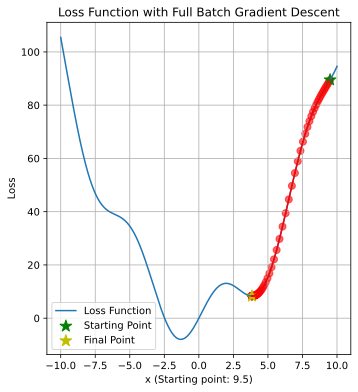

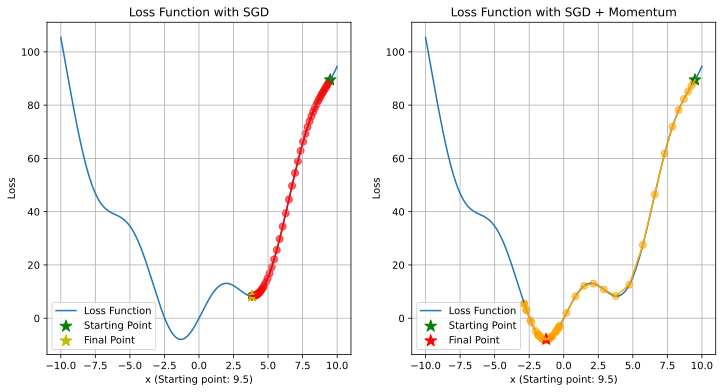

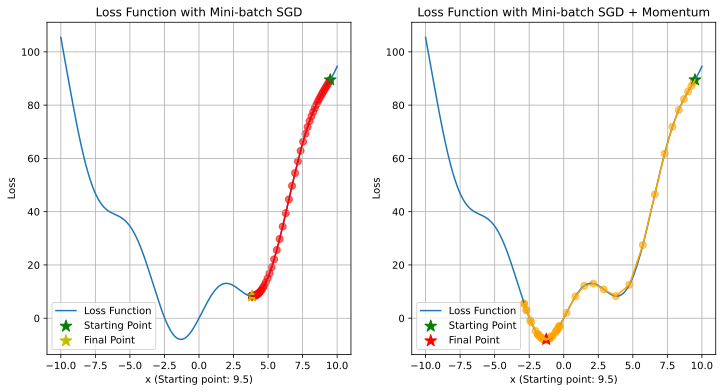

In [11]:
compute(9.5, learning_rate=0.01, max_iters=1000, batch_size=10, momentum=0.9)

9.5
Gradient Descent Result: 3.837641954421997 after 29 iterations
Stochastic Gradient Descent Result: 3.837641954421997 after 29 iterations
Mini-batch Stochastic Gradient Descent Result: 3.837641954421997 after 29 iterations
SGD with Momentum Result: 3.8337414264678955 after 120 iterations
Mini-batch SGD with Momentum Result: 3.8337414264678955 after 120 iterations


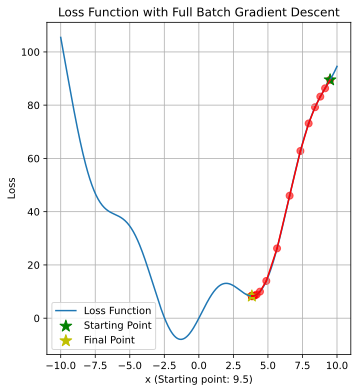

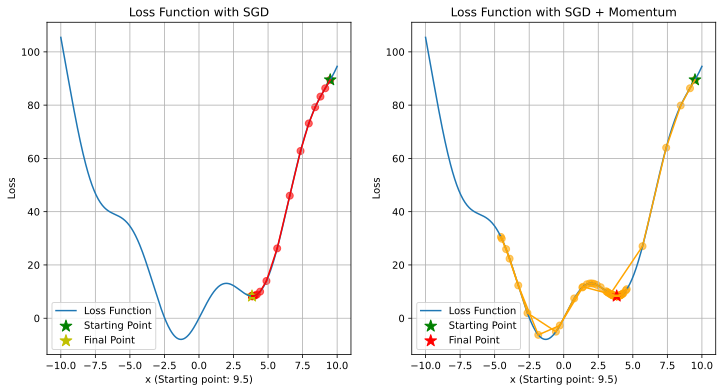

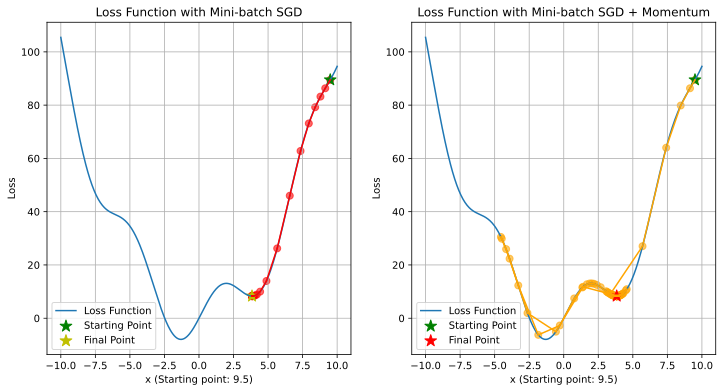

In [12]:
compute(9.5, learning_rate=0.04, max_iters=1000, batch_size=10, momentum=0.9)

9.5
Gradient Descent Result: 3.837641954421997 after 29 iterations
Stochastic Gradient Descent Result: 3.837641954421997 after 29 iterations
Mini-batch Stochastic Gradient Descent Result: 3.837641954421997 after 29 iterations
SGD with Momentum Result: -1.305068016052246 after 306 iterations
Mini-batch SGD with Momentum Result: -1.305068016052246 after 306 iterations


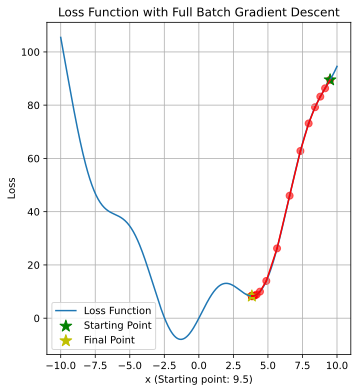

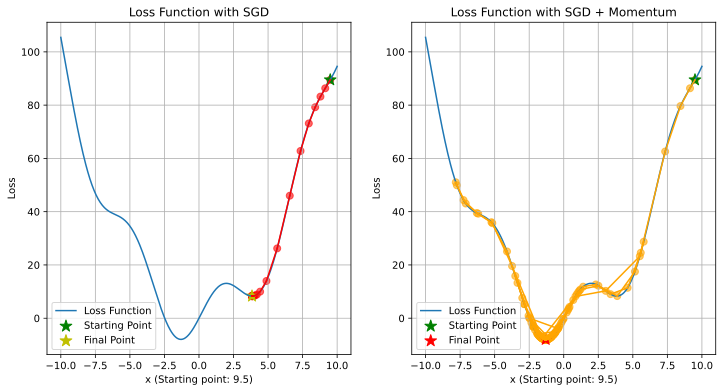

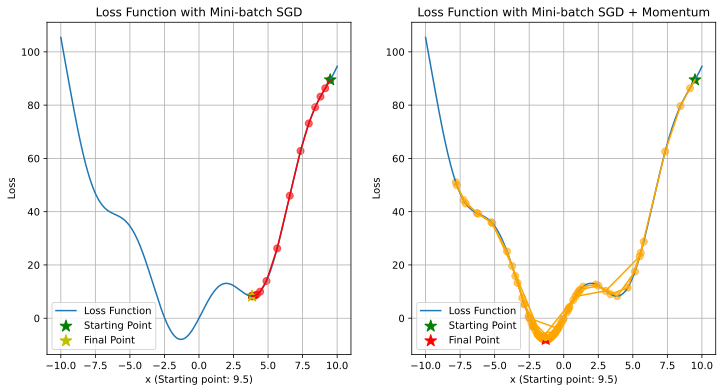

In [13]:
compute(9.5, learning_rate=0.04, max_iters=1000, batch_size=10, momentum=0.95)

9.5
Gradient Descent Result: 3.8375864028930664 after 64 iterations
Stochastic Gradient Descent Result: 3.8375864028930664 after 64 iterations
Mini-batch Stochastic Gradient Descent Result: 3.8375864028930664 after 64 iterations
SGD with Momentum Result: -1.3056260347366333 after 154 iterations
Mini-batch SGD with Momentum Result: -1.3056260347366333 after 154 iterations


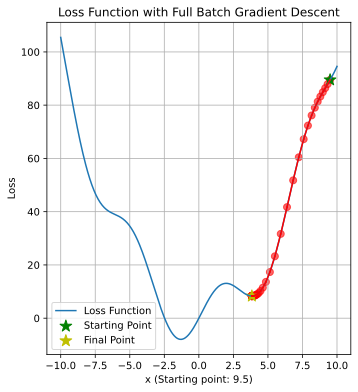

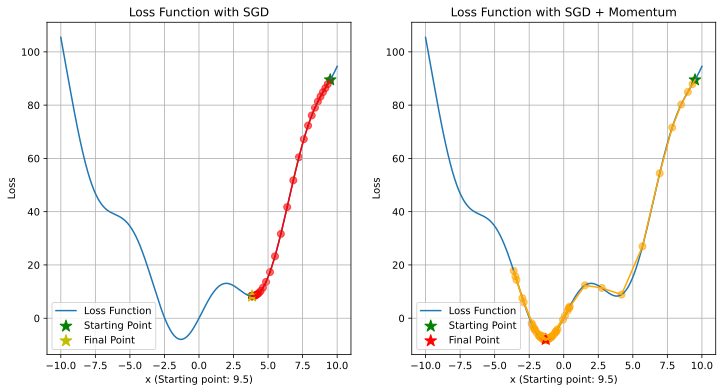

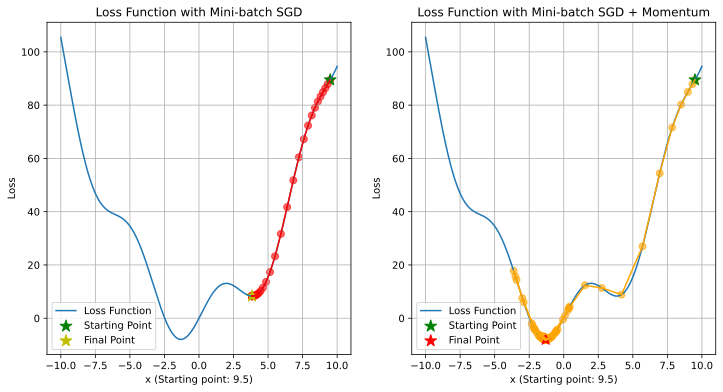

In [14]:
compute(9.5, learning_rate=0.02, max_iters=1000, batch_size=5, momentum=0.9)

### **IV. Bài tập mở rộng ngoài D2L**
---

### IV.0. **Quy ước**

Trước khi thực hiện giải các bài toán tối ưu bằng các áp dụng các phương pháp **Gradient Descent và tối ưu với **Momentum**, cần tìm hiểu các quy ước chung về ký hiệu và công thức như sau:

#### IV.0.1. Cấu trúc

Vector tham số $(\theta)$ bao gồm weights $(w)$ và bias $(b)$, ký thiệu như sau:

\begin{align}
\theta = 
\begin{bmatrix}
w_{1} \\ w_{2} \\ w_{3} \\ b
\end{bmatrix}
\tag{5.0.1}
\end{align}

#### IV.0.2. Công thức tính Momentum

- Bước 1: Tính Gradient: $\nabla \mathbf{J} (\theta_{t})$
- Bước 2: Tính vận tốc (velocity): $\mathbf{v}_{t+1} = \beta \mathbf{v}_t + \nabla \mathbf{J} (\theta_{t})$
- Bước 3: Cập nhật tham số: $\theta_{t+1} = \theta_{t} - \eta \mathbf{v}_{t+1}$

#### IV.0.3. Hằng số

- Learning rate: $\eta = 0.1$
- Momentum factor: $\beta = 0.9$
- Khởi tạo vận tốc ban đầu: $\mathbf{v}_{0} = [0,0,0,0]^\top$

### IV.1. **Hồi quy tuyến tính đa biến (Multivariate Linear Regression)**

**Mục tiêu**: Hiểu cách Momentum hoạt động với hàm loss MSE (L2 Norm) trên không gian nhiều chiều.

#### IV.1.1. Thiết lập bài toán

- Mô hình: 
  
  \begin{align}
  f(x) = \mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b \tag{5.1.1}
  \end{align}

- Dữ liệu (một mẫu):
  - Input: $\mathbf{x} = [2, 1, -1]^\top$
  - Output thực tế: $y = 5$
- Khởi tạo tham số:
  $$ \theta_{0} = [0, 0, 0, 0]^\top = [\mathbf{w}_1, \mathbf{w}_2, \mathbf{w}_3, b]^\top $$
- Hàm Loss:
  
  \begin{align}
  \mathbf{J} = \frac{1}{2}(\hat{y}-y)^2 = \frac{1}{2}(\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)^2 \tag{5.1.2}
  \end{align}

- Tính gradient:
  
  \begin{aligned}
  \nabla \mathbf{J}(\theta)

  &= [\frac{\partial \mathbf{J}}{\partial \mathbf{w}_1}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_2}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_3}, \frac{\partial \mathbf{J}}{\partial b}]^\top \\

  &= [\frac{\partial [\frac{1}{2}(\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)^2]}{\partial \mathbf{w}_1}, ..., \frac{\partial [\frac{1}{2}(\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)^2]}{\partial b}]^\top \\

  &= [(\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)x_1, ..., (\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)]^\top \\

  &= (\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)[x_1, x_2, x_3, 1]^\top \\

  &= (\hat{y} - y)[x_1, x_2, x_3, 1]^\top

  \end{aligned}
  
Vậy:

\begin{align}
\nabla \mathbf{J}(\theta) = \nabla \mathbf{J}(\mathbf{w}_1, \mathbf{w}_2, \mathbf{w}_3, b) = (\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b - y)[x_1, x_2, x_3, 1]^\top \tag{5.1.3}
\end{align}

#### V.1.2. Giải chi tiết

Vòng lặp 1, bước 1: Tính Forward và gradient

- Dự đoán:

  \begin{aligned}
  \hat{y}_1 &= \mathbf{w}_{1,0} x_1 + \mathbf{w}_{2,0} x_2 + \mathbf{w}_{3,0} x_3 + b \\
  &= 0 \cdot 2 + 0 \cdot 1 + 0 \cdot (-1) + 0 \\
  &= 0
  \end{aligned}

- Sai số: $hat{y}_1 - y = 0 - 5 = -5$
- Gradient: $\nabla \mathbf{J}(\theta_0) = (\hat{y}_1 - y)[x_1, x_2, x_3, 1]^\top = -5[2, 1, -1, 1]^\top = [-10, -5, 5, -5]^\top$

Bước 2: Tính vận tốc $\mathbf{v}_1$:

$$ \mathbf{v}_1 = \beta \mathbf{v}_0 + \nabla \mathbf{J}(\theta_0) = 0.9[0,0,0,0]^\top + [-10,-5,5,-5]^\top = [-10,-5,5,-5]^\top $$

Bước 3: Cập nhật tham số $\theta_1$:

$$ \theta_1 = \theta_0 - \eta \mathbf{v}_1 = [0,0,0,0]^\top - 0.1[-10,-5,5,-5]^\top = [1, 0.5, -0.5, 0.5]^\top $$

Vòng lặp 2, bước 1: Tính Forward và gradient

- Dự đoán:

  \begin{aligned}
  \hat{y}_2 &= \mathbf{w}_{1,1} x_1 + \mathbf{w}_{2,1} x_2 + \mathbf{w}_{3,1} x_3 + b \\
  &= 1 \cdot 2 + 0.5 \cdot 1 + (-0.5) \cdot (-1) + 0.5 \\
  &= 3.5
  \end{aligned}

- Sai số: $hat{y}_2 - y = 3.5 - 5 = -1.5$
- Gradient: $\nabla \mathbf{J}(\theta_1) = (\hat{y}_2 - y)[x_1, x_2, x_3, 1]^\top = -1.5[2, 1, -1, 1]^\top = [-3, -1.5, 1.5, -1.5]^\top$

Bước 2: Tính vận tốc $\mathbf{v}_2$:

$$ \mathbf{v}_2 = \beta \mathbf{v}_1 + \nabla \mathbf{J}(\theta_1) = 0.9[-10,-5,5,-5]^\top + [-3,-1.5,1.5,-1.5]^\top = [-12,-6,6,-6]^\top $$

Bước 3: Cập nhật tham số $\theta_2$:

$$ \theta_2 = \theta_1 - \eta \mathbf{v}_2 = [1,0.5,-0.5,0.5]^\top - 0.1[-12,-6,6,-6]^\top = [2.2, 1.1, -1.1, 1.1]^\top $$

Vòng lặp 3, bước 1:

Tính $\hat{y}_3$ 

\begin{aligned}
\hat{y}_3 &= \mathbf{w}_{1,2} x_1 + \mathbf{w}_{2,2} x_2 + \mathbf{w}_{3,2} x_3 + b \\
&= 2.2 \cdot 2 + 1.1 \cdot 1 + (-1.1) \cdot (-1) + 1.1 \\
&= 7.7
\end{aligned}

=== MOMENTUM MANUAL SIMULATION ===


---- Iteration 1 ----
y_hat_before_update: 0.0
error: -5.0
gradient: [-10.  -5.   5.  -5.]
v_t: [-10.  -5.   5.  -5.]
theta: [ 1.   0.5 -0.5  0.5]
y_hat_after_update: 3.5

---- Iteration 2 ----
y_hat_before_update: 3.5
error: -1.5
gradient: [-3.  -1.5  1.5 -1.5]
v_t: [-12.  -6.   6.  -6.]
theta: [ 2.2  1.1 -1.1  1.1]
y_hat_after_update: 7.699999999999999

---- Iteration 3 ----
y_hat_before_update: 7.699999999999999
error: 2.6999999999999993
gradient: [ 5.4  2.7 -2.7  2.7]
v_t: [-5.4 -2.7  2.7 -2.7]
theta: [ 2.74  1.37 -1.37  1.37]
y_hat_after_update: 9.59

---- Iteration 4 ----
y_hat_before_update: 9.59
error: 4.59
gradient: [ 9.18  4.59 -4.59  4.59]
v_t: [ 4.32  2.16 -2.16  2.16]
theta: [ 2.308  1.154 -1.154  1.154]
y_hat_after_update: 8.078000000000001

---- Iteration 5 ----
y_hat_before_update: 8.078000000000001
error: 3.078000000000001
gradient: [ 6.156  3.078 -3.078  3.078]
v_t: [10.044  5.022 -5.022  5.022]
theta: [ 1.3036  0.6518 -0.6518  0.6

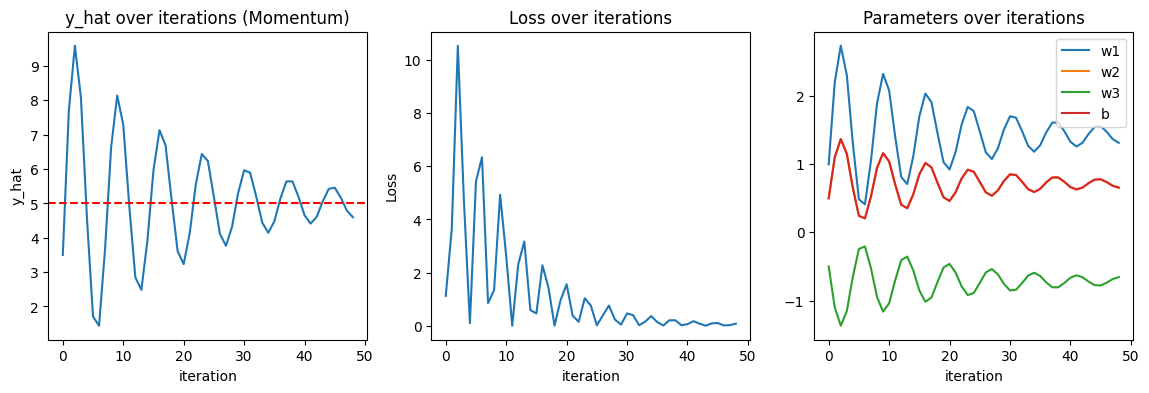

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Input và output
x = np.array([2.0, 1.0, -1.0, 1.0])  # [x1, x2, x3, 1]
y = 5.0

# Hyperparameters
eta = 0.1
beta = 0.9

# Khởi tạo
theta = np.array([0.0, 0.0, 0.0, 0.0])
v = np.array([0.0, 0.0, 0.0, 0.0])

# For plotting
history_yhat = []
history_loss = []
history_theta = []

def forward(theta, x):
    return np.dot(theta, x)

def gradient(theta, x, y):
    y_hat = forward(theta, x)
    error = y_hat - y
    grad = error * x
    return y_hat, error, grad

print("=== MOMENTUM MANUAL SIMULATION ===\n")

for t in range(1, 50):
    print(f"\n---- Iteration {t} ----")

    y_hat, error, grad = gradient(theta, x, y)
    print("y_hat_before_update:", y_hat)
    print("error:", error)
    print("gradient:", grad)

    # Momentum update
    v = beta * v + grad
    print("v_t:", v)

    theta = theta - eta * v
    print("theta:", theta)

    # After update
    y_hat_after = forward(theta, x)
    print("y_hat_after_update:", y_hat_after)

    # Save history
    history_yhat.append(y_hat_after)
    history_loss.append((y_hat_after - y)**2 / 2)
    history_theta.append(theta.copy())


# ---------- PLOTTING (D2L style) ----------
plt.figure(figsize=(14,4))

# Plot predicted ŷ
plt.subplot(1, 3, 1)
plt.plot(history_yhat)
plt.axhline(y, color='r', linestyle='--')
plt.title("y_hat over iterations (Momentum)")
plt.xlabel("iteration")
plt.ylabel("y_hat")

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(history_loss)
plt.title("Loss over iterations")
plt.xlabel("iteration")
plt.ylabel("Loss")

# Plot parameters
history_theta = np.array(history_theta)
plt.subplot(1, 3, 3)
plt.plot(history_theta[:,0], label="w1")
plt.plot(history_theta[:,1], label="w2")
plt.plot(history_theta[:,2], label="w3")
plt.plot(history_theta[:,3], label="b")
plt.title("Parameters over iterations")
plt.xlabel("iteration")
plt.legend()

plt.show()


### IV.2. **Logistic Regression (Bài toán phân loại)**

**Mục tiêu**: Áp dụng Momentum với hàm phi tuyến Sigmoid và Loss Binary Cross Enropy.

#### IV.2.1. Thiết lập bài toán

- Mô hình:

  \begin{align}
  \mathbf{z} = \mathbf{w}_{1} x_1 + \mathbf{w}_{2} x_2 + \mathbf{w}_{3} x_3 + b 
  \Rightarrow a = \sigma (\mathbf{z}) = \frac {1}{1+e^{-\mathbf{z}}}
  \tag{5.2.1}
  \end{align}

- Khởi tạo:  $ \theta_{0} = [0, 0, 0, 0]^\top = [\mathbf{w}_1, \mathbf{w}_2, \mathbf{w}_3, b]^\top $
- Hàm Loss (Binary Cross Entropy): <br>
  *Vì đây là bài toán phân loại nhị phân (0 hoặc 1), ta không dùng L2 mà dùng BCE.*

  \begin{align}
  \mathbf{J} = -[y \cdot ln(a) + (1-y) \cdot ln(1-a)]
  \tag{5.2.2}
  \end{align}

  Thay $a=\sigma (\mathbf{w}_{1} x_1 + \mathbf{w}_{2} x_2 + \mathbf{w}_{3} x_3 + b)$ ta có hàm theo các biến $\mathbf{w}, b$:

  \begin{align}
  \mathbf{J} (\mathbf{w}, b) = -[y \cdot ln(\sigma (\mathbf{z})) + (1-y) \cdot ln(1-\sigma (\mathbf{z}))]
  \tag{5.2.3}
  \end{align}

- Tính gradient:
  \begin{align}
  \nabla \mathbf{J}(\theta)
  &= [\frac{\partial \mathbf{J}}{\partial \mathbf{w}_1}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_2}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_3}, \frac{\partial \mathbf{J}}{\partial b}]^\top
  \tag{5.2.4}
  \end{align}

  Sử dụng **Chain Rule** cho một biến $\mathbf{w}_i$ bất kỳ, ta có chuỗi phụ thuộc: $\mathbf{w}_i \rightarrow \mathbf{z} \rightarrow a \rightarrow \mathbf{J}$.

  $$ \Rightarrow \frac{\partial \mathbf{J}}{\partial \mathbf{w}_i} = 
  \frac{\partial \mathbf{J}}{\partial a} \times 
  \frac{\partial a}{\partial \mathbf{z}} \times 
  \frac{\partial \mathbf{z}}{\partial \mathbf{w}_i} $$

  - Bước 1: Tính $\frac{\partial \mathbf{J}}{\partial a}$

  \begin{aligned}
  \frac{\partial \mathbf{J}}{\partial a}
  &= \frac{\partial \{-[y \cdot ln(a) + (1-y) \cdot ln(1-a)]\}}{\partial a} \\
  &= -\{ \frac{\partial [y \cdot ln(a)]}{\partial a} + \frac{\partial [(1-y)ln(1-a)]}{\partial a} \} \\
  &= -[y \cdot \frac{1}{a} + (1-y) \cdot (-1) \cdot \frac{1}{1-a}] \\
  &= -\frac{y}{a} + \frac{1-y}{1-a} \\
  &= \frac{a-y}{a(1-a)} \\
  \end{aligned}

  \begin{align}
  \Rightarrow \frac{\partial \mathbf{J}}{\partial a} = \frac{a-y}{a(1-a)} 
  \tag{5.2.5}
  \end{align}

  - Bước 2: Tính $\frac{\partial a}{\partial \mathbf{z}}$

  \begin{aligned}
  \frac{\partial a}{\partial \mathbf{z}}
  &= \frac{\partial[\sigma(\mathbf{z})]}{\partial \mathbf{z}} \\
  &= \frac{\partial[ \frac{1}{1+e^{-z}} ]}{\partial \mathbf{z}} \\
  &= \frac{\partial[ \frac{1}{1+\frac{1}{e^z}} ]}{\partial \mathbf{z}} \\
  &= \frac{\partial[ \frac{1}{\frac{e^z+1}{e^z}} ]}{\partial \mathbf{z}} \\
  &= \frac{\partial[ \frac{e^z}{1+e^z} ]}{\partial \mathbf{z}} \\
  &= \frac{(e^z)'(1+e^z) - e^z(1+e^z)'}{(1+e^z)^2} \\
  &= \frac{e^z (1+e^z)-e^z e^z}{(1+e^z)^2} \\
  &= \frac{e^z}{(1+e^z)^2}(1+e^z-e^z)    \leftarrow xem lại  \\
  &= \frac{e^z}{1+e^z}(\frac{1+e^z}{1+e^z} - \frac{e^z}{1+e^z}) \\
  &= \sigma(\mathbf{z})[1-\sigma(\mathbf{z})] \\
  &= a \cdot (1 - a)
  \end{aligned}

  \begin{align}
  \frac{\partial a}{\partial \mathbf{z}} = a \cdot (1 - a)
  \tag{5.2.6}
  \end{align}

  - Bước 3: Tính $\frac{\partial \mathbf{z}}{\partial \mathbf{w}_i}$

  \begin{aligned}
  \frac{\partial \mathbf{z}}{\partial \mathbf{w}_i} = \frac{\partial(\mathbf{w}_1 x_1 + \mathbf{w}_2 x_2 + \mathbf{w}_3 x_3 + b)}{\partial \mathbf{w}_i}
   \Rightarrow \frac{\partial \mathbf{z}}{\partial \mathbf{w}_1} = x_1; \frac{\partial \mathbf{z}}{\partial \mathbf{w}_2} = x_2; \frac{\partial \mathbf{z}}{\partial \mathbf{w}_3} = x_3; \frac{\partial \mathbf{z}}{\partial b} = 1;
   \tag{5.2.7}
  \end{aligned}

Từ $(5.2.5)$, $(5.2.6)$, $(5.2.7)$ ta có:

\begin{aligned}
\nabla \mathbf{J}(\theta)
&= [\frac{\partial \mathbf{J}}{\partial \mathbf{w}_1}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_2}, \frac{\partial \mathbf{J}}{\partial \mathbf{w}_3}, \frac{\partial \mathbf{J}}{\partial b}]^\top \\
&= [
  \frac{\partial \mathbf{J}}{\partial a} \times 
  \frac{\partial a}{\partial \mathbf{z}} \times 
  \frac{\partial \mathbf{z}}{\partial \mathbf{w}_1},
  \frac{\partial \mathbf{J}}{\partial a} \times 
  \frac{\partial a}{\partial \mathbf{z}} \times 
  \frac{\partial \mathbf{z}}{\partial \mathbf{w}_2},
  \frac{\partial \mathbf{J}}{\partial a} \times 
  \frac{\partial a}{\partial \mathbf{z}} \times 
  \frac{\partial \mathbf{z}}{\partial \mathbf{w}_3},
  \frac{\partial \mathbf{J}}{\partial a} \times 
  \frac{\partial a}{\partial \mathbf{z}} \times 
  \frac{\partial \mathbf{z}}{\partial b}
]^\top \\
&= \frac{\partial \mathbf{J}}{\partial a} \times 
   \frac{\partial a}{\partial \mathbf{z}} \times
   [\frac{\partial \mathbf{z}}{\partial \mathbf{w}_1}, 
   \frac{\partial \mathbf{z}}{\partial \mathbf{w}_2}, 
   \frac{\partial \mathbf{z}}{\partial \mathbf{w}_3}, 
   \frac{\partial \mathbf{z}}{\partial b}]^\top \\
&= \frac{a-y}{a(1-a)} \cdot a \cdot (1 - a) \cdot [x_1, x_2, x_3, 1]^\top \\
&= (a-y) \cdot [x_1, x_2, x_3, 1]^\top
\end{aligned}

Vậy: $\nabla \mathbf{J}(\theta) = (a-y) \cdot [x_1, x_2, x_3, 1]^\top$

## 2. Giải chi tiết

### Vòng lặp 1:

**Bước 1: Tính Forward & Gradient.**
* **Forward:**
$$z_1 = w_0 x_1 + w_0 x_2 + w_0 x_3 + b_0 = 0 \times 1 + 0 \times 2 + 0 \times 1 + 0 = 0$$

$$a_1 = \sigma(z_1) = \frac{1}{1+e^{-z_1}} = \frac{1}{1+e^{-0}} = 0.5$$

* **Gradient:**
    $$\nabla J(\theta_0) = (a_1 - y)[x_1, x_2, x_3, 1]^T$$
    $$= (0.5 - 1)[1, 2, 1, 1]^T = [-0.5; -1; -0.5; -0.5]^T$$

**Bước 2: Tính vận tốc $\mathbf{v}_1$**

$$\mathbf{v}_1 = \beta \mathbf{v}_0 + \nabla J(\theta_0) = 0.9[0, 0, 0, 0]^T + [-0.5; -1; -0.5; -0.5]^T$$
$$= [-0.5; -1; -0.5; -0.5]^T$$

**Bước 3: Cập nhật tham số $\theta_1$**

$$\theta_1 = \theta_0 - \eta \mathbf{v}_1 = [0, 0, 0, 0]^T - 0.1[-0.5; -1; -0.5; -0.5]^T$$
$$= [0.05; 0.1; 0.05; 0.05]^T$$

---

### Vòng lặp 2:

**Bước 1: Tính Forward & Gradient.**
* **Forward:**
$$z_2 = w_{1,1} x_1 + w_{2,1} x_2 + w_{3,1} x_3 + b_1$$
$$= 0.05 \times 1 + 0.1 \times 2 + 0.05 \times 1 + 0.05 = 0.35$$

$$a_2 = \sigma(z_2) = \frac{1}{1+e^{-z_2}} = \frac{1}{1+e^{-0.35}} = 0.587$$

* **Gradient:**
    $$\nabla J(\theta_1) = (a_2 - y)[x_1, x_2, x_3, 1]^T$$
    $$= (0.587 - 1)[1, 2, 1, 1]^T = [-0.413; -0.826; -0.413; -0.413]^T$$

**Bước 2: Tính vận tốc $\mathbf{v}_2$**

$$\mathbf{v}_2 = \beta \mathbf{v}_1 + \nabla J(\theta_1)$$
$$= 0.9[-0.5; -1; -0.5; -0.5]^T + [-0.413; -0.826; -0.413; -0.413]^T$$
$$= [-0.863; -1.726; -0.863; -0.863]^T$$

**Bước 3: Cập nhật tham số $\theta_2$**

$$\theta_2 = \theta_1 - \eta \mathbf{v}_2$$
$$= [0.05; 0.1; 0.05; 0.05]^T - 0.1[-0.863; -1.726; -0.863; -0.863]^T$$
$$= [0.1363; 0.2726; 0.1363; 0.1363]^T$$

=== LOGISTIC REGRESSION WITH MOMENTUM ===


---- Iteration 1 ----
z: 0.0
a (sigmoid): 0.5
loss: 0.6931471785599453
gradient: [-0.5 -1.  -0.5 -0.5]
v_t: [-0.5 -1.  -0.5 -0.5]
theta: [0.05 0.1  0.05 0.05]

---- Iteration 2 ----
z: 0.35
a (sigmoid): 0.5866175789173301
loss: 0.5333821537140889
gradient: [-0.41338242 -0.82676484 -0.41338242 -0.41338242]
v_t: [-0.86338242 -1.72676484 -0.86338242 -0.86338242]
theta: [0.13633824 0.27267648 0.13633824 0.13633824]

---- Iteration 3 ----
z: 0.9543676947578692
a (sigmoid): 0.7219927078397248
loss: 0.3257402387002396
gradient: [-0.27800729 -0.55601458 -0.27800729 -0.27800729]
v_t: [-1.05505147 -2.11010294 -1.05505147 -1.05505147]
theta: [0.24184339 0.48368678 0.24184339 0.24184339]

---- Iteration 4 ----
z: 1.6929037245521439
a (sigmoid): 0.8446056463255734
loss: 0.16888545011396164
gradient: [-0.15539435 -0.31078871 -0.15539435 -0.15539435]
v_t: [-1.10494068 -2.20988136 -1.10494068 -1.10494068]
theta: [0.35233746 0.70467491 0.35233746 0.35233746]


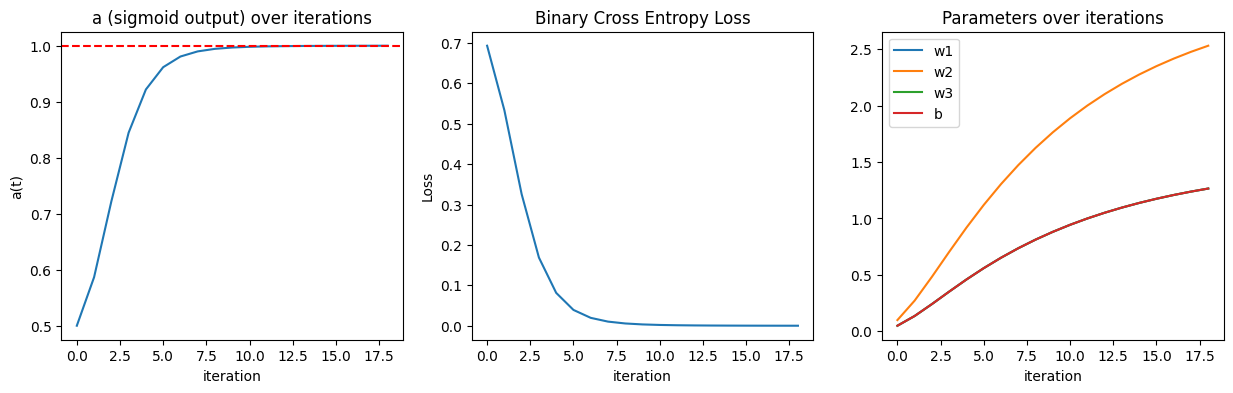

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. Khởi tạo bài toán
# ============================

# Input: x = [x1, x2, x3, 1] để tính bias
x = np.array([1.0, 2.0, 1.0, 1.0])

# Label nhị phân
y = 1.0

# Hyperparameters
eta = 0.1
beta = 0.9

# Parameters theta = [w1, w2, w3, b]
theta = np.array([0.0, 0.0, 0.0, 0.0])
v = np.zeros_like(theta)


# ============================
# 2. Định nghĩa hàm
# ============================

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(theta, x):
    z = np.dot(theta, x)
    a = sigmoid(z)
    return z, a

def loss_BCE(a, y):
    return -(y * np.log(a + 1e-9) + (1 - y) * np.log(1 - a + 1e-9))

def gradient(theta, x, y):
    z, a = forward(theta, x)
    grad = (a - y) * x       # đúng công thức bạn đã suy ra
    return z, a, grad


# ============================
# 3. Lưu history để plot
# ============================

history_a = []
history_loss = []
history_theta = []


print("=== LOGISTIC REGRESSION WITH MOMENTUM ===\n")


# ============================
# 4. Vòng lặp cập nhật
# ============================

for t in range(1, 20):
    print(f"\n---- Iteration {t} ----")

    # Forward + grad
    z, a, grad = gradient(theta, x, y)
    loss = loss_BCE(a, y)

    print("z:", z)
    print("a (sigmoid):", a)
    print("loss:", loss)
    print("gradient:", grad)

    # Momentum update
    v = beta * v + grad
    print("v_t:", v)

    theta = theta - eta * v
    print("theta:", theta)

    # Save history for plotting
    history_a.append(a)
    history_loss.append(loss)
    history_theta.append(theta.copy())


# ============================
# 5. Plot giống D2L
# ============================

plt.figure(figsize=(15,4))

# Plot a(t)
plt.subplot(1, 3, 1)
plt.plot(history_a)
plt.axhline(y, color='r', linestyle='--')
plt.title("a (sigmoid output) over iterations")
plt.xlabel("iteration")
plt.ylabel("a(t)")

# Loss
plt.subplot(1, 3, 2)
plt.plot(history_loss)
plt.title("Binary Cross Entropy Loss")
plt.xlabel("iteration")
plt.ylabel("Loss")

# Theta components
history_theta = np.array(history_theta)
plt.subplot(1, 3, 3)
plt.plot(history_theta[:,0], label="w1")
plt.plot(history_theta[:,1], label="w2")
plt.plot(history_theta[:,2], label="w3")
plt.plot(history_theta[:,3], label="b")
plt.title("Parameters over iterations")
plt.xlabel("iteration")
plt.legend()

plt.show()
